# Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#no text
url1 = 'https://drive.google.com/uc?export=download&id=1xLr-pX-T9hQTB2boQaQ0I6as9nmgEiHu'

#with text
url2 = 'https://drive.google.com/uc?export=download&id=1fIt8n75pSaMKbZMwOHPOYzm0MRp2IrvT'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [ ]:
df1.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q36,Q4,Q38,Q10,Q14,Q46_1,Q46_2,Q46_3,Q46_4,Q46_5,Q46_6,Q46_7,Q15,Q40,Q16,Q41,Q42,Q43,Q51,Q51_4_TEXT,Q21,Q57,Q58,Q24,Q55,Q55_4_TEXT,Q56,Q32,Q33,Q34,Q2,Q2_3_TEXT,Q3,Q49,Q49_3_TEXT,Q32.1
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of...,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at...,How would you rate your experience picking up ...,How would you rate the staff service at HEYTEA?,How do you usually receive promotional informa...,How do you usually receive promotional informa...,"If you see this promotion offer today, will yo...",How appealing is this promotion offer to you?,"Compared with other beverage brands, how compe...",Do you think this promotion is worth recommend...,How do you usually receive promotional informa...,How do you usually receive promotional informa...,"If you see this promotion offer today, will yo...",How appealing is this promotion offer to you?,"Compared with other beverage brands, how compe...",Do you think this promotion is worth recommend...,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - ...,Please share your suggestions or other valuabl...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}","{""ImportId"":""recipientFirstName""}","{""ImportId"":""recipientEmail""}","{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID39""}","{""ImportId"":""QID13""}","{""ImportId"":""QID41""}","{""ImportId"":""QID15""}","{""ImportId"":""QID19""}","{""ImportId"":""QID49_1""}","{""ImportId"":""QID49_2""}","{""ImportId"":""QID49_3""}","{""ImportId"":""QID49_4""}","{""ImportId"":""QID49_5""}","{""ImportId"":""QID49_6""}","{""ImportId"":""QID49_8""}","{""ImportId"":""QID20""}","{""ImportId"":""QID43""}","{""ImportId"":""QID21""}","{""ImportId"":""QID44""}","{""ImportId"":""QID45""}","{""ImportId"":""QID46""}","{""ImportId"":""QID54""}","{""ImportId"":""QID54_4_TEXT""}","{""ImportId"":""QID24""}","{""ImportId"":""QID60""}","{""ImportId"":""QID61""}","{""ImportId"":""QID27""}","{""ImportId"":""QID58""}","{""ImportId"":""QID58_4_TEXT""}","{""ImportId"":""QID59""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33""}","{""ImportId"":""QID34""}","{""ImportId"":""QID8""}","{""ImportId"":""QID8_3_TEXT""}","{""ImportId"":""QID9""}","{""Imp

# Data Cleaning

### Divided data into A/B

In [ ]:
# 指定A组和B组的问题
a_questions = ['Q51', 'Q21', 'Q57', 'Q58', 'Q24'] #买一送一 = 0
b_questions = ['Q55', 'Q56', 'Q32', 'Q33', 'Q34'] #帆布包活动 = 1

def classify_group(row):
    if row[a_questions].notna().any():
        return '1'
    elif row[b_questions].notna().any():
        return '0'
    else:
        return 'nonsence data'

df1['group'] = df1.apply(classify_group, axis=1)

group_counts = df1['group'].value_counts()
print("各组人数统计：")
print(group_counts)

各组人数统计：
group
1                63
0                56
nonsence data    31
Name: count, dtype: int64


In [ ]:
df2['group'] = df2.apply(classify_group, axis=1)

group_counts = df2['group'].value_counts()
print("各组人数统计：")
print(group_counts)

各组人数统计：
group
1                63
0                56
nonsence data    31
Name: count, dtype: int64


In [ ]:
df2[df2['group']=='nonsence data']

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q36,Q4,Q38,Q10,Q14,Q46_1,Q46_2,Q46_3,Q46_4,Q46_5,Q46_6,Q46_7,Q15,Q40,Q16,Q41,Q42,Q43,Q51,Q51_4_TEXT,Q21,Q57,Q58,Q24,Q55,Q55_4_TEXT,Q56,Q32,Q33,Q34,Q2,Q2_3_TEXT,Q3,Q49,Q49_3_TEXT,Q32.1,group
8,2025/4/2 17:28,2025/4/2 17:42,IP Address,128.197.28.130,70,820,FALSE,2025/4/9 17:42,R_3KqGgOIyUhA2CNb,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
14,2025/4/2 17:50,2025/4/2 17:53,IP Address,128.197.28.160,12,135,FALSE,2025/4/9 17:53,R_63yGbzB2jBsK00H,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
19,2025/4/2 17:53,2025/4/2 17:58,IP Address,128.197.28.179,12,299,FALSE,2025/4/9 17:59,R_6V3C7Skugux80Fx,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,ZH-S,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
21,2025/4/2 17:37,2025/4/2 18:04,IP Address,128.197.28.178,70,1617,FALSE,2025/4/9 18:04,R_6Fl5rxGoo55bIY1,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
23,2025/4/2 17:42,2025/4/2 18:05,IP Address,128.197.28.130,70,1381,FALSE,2025/4/9 18:05,R_5q7Iy4uJHiLM49C,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
25,2025/4/2 17:25,2025/4/2 18:07,IP Address,128.197.28.165,9,2562,FALSE,2025/4/9 18:07,R_7ZIHCqfSkMQ57vL,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
26,2025/4/2 17:25,2025/4/2 18:11,IP Address,204.8.158.102,70,2730,FALSE,2025/4/9 18:11,R_6gvHQZvVCFrzD69,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
42,2025/4/2 16:34,2025/4/2 20:34,IP Address,73.159.157.40,12,14403,FALSE,2025/4/9 20:34,R_5Wx1TFARLJXae73,NaN,NaN,NaN,NaN,42.3464,-71.0975,anonymous,EN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
48,2025/4/3 14:40,2025/4/4 6:47,IP Address,128.197.28.182,12,57977,FALSE,2025/4/11 6:47,R_7DNnqReNYdl5Fym,NaN,NaN,NaN,NaN,42.3399,-71.1245,anonymous,EN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data
49,2025/4/5 8:32,2025/4/5 8:33,IP Address,73.100.116.240,9,11,FALSE,2025/4/12 8:33,R_3gFLGAvA6zNPOk4,NaN,NaN,NaN,NaN,42.2506,-71.1286,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonsence data


### Delete Nonsense Row

In [ ]:
df1= df1.drop(index=1).reset_index(drop=True)
df1.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q36,Q4,Q38,Q10,Q14,Q46_1,Q46_2,Q46_3,Q46_4,Q46_5,Q46_6,Q46_7,Q15,Q40,Q16,Q41,Q42,Q43,Q51,Q51_4_TEXT,Q21,Q57,Q58,Q24,Q55,Q55_4_TEXT,Q56,Q32,Q33,Q34,Q2,Q2_3_TEXT,Q3,Q49,Q49_3_TEXT,Q32.1,group
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of...,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at...,How would you rate your experience picking up ...,How would you rate the staff service at HEYTEA?,How do you usually receive promotional informa...,How do you usually receive promotional informa...,"If you see this promotion offer today, will yo...",How appealing is this promotion offer to you?,"Compared with other beverage brands, how compe...",Do you think this promotion is worth recommend...,How do you usually receive promotional informa...,How do you usually receive promotional informa...,"If you see this promotion offer today, will yo...",How appealing is this promotion offer to you?,"Compared with other beverage brands, how compe...",Do you think this promotion is worth recommend...,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - ...,Please share your suggestions or other valuabl...,1
1,2025/4/9 17:25,2025/4/9 17:26,0,209.6.105.178,100,93,1,2025/4/9 17:26,R_7mgvkIWiJpwFEl3,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,1,3,3,2,4,4,5,4,3,5,2,5,4,4,3,3,5,5,NaN,NaN,NaN,NaN,NaN,NaN,4,喜茶福利微信群）,4,3,3,2,1,NaN,2,1,NaN,NaN,0
2,2025/4/9 17:25,2025/4/9 17:27,0,71.235.57.7,100,118,1,2025/4/9 17:27,R_3CZZ2ayiKMXmuWn,NaN,NaN,NaN,NaN,42.3268,-71.1341,anonymous,ZH-S,1,3,3,2,4,5,5,5,3,5,3,5,3,3,1,1,1,4,3,NaN,1,1,3,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,1
3,2025/4/9 17:34,2025/4/9 17:35,0,52.124.35.161,100,68,1,2025/4/9 17:35,R_5atz3GFMgAzI11K,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,1,1,1,1,3,3,4,5,4,4,3,3,4,3,3,3,2,4,3,NaN,4,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,1
4,2025/4/9 17:34,2025/4/9 17:35,0,130.44.118.216,100,75,1,2025/4/9 17:35,R_6cjPtYOb0XPwlL4,NaN,NaN,NaN,NaN,42.3474,-71.1582,anonymous,EN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,3,3,1,1,NaN,1,3,India,NaN,0


In [ ]:
df2= df2.drop(index=1).reset_index(drop=True)
df2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q36,Q4,Q38,Q10,Q14,Q46_1,Q46_2,Q46_3,Q46_4,Q46_5,Q46_6,Q46_7,Q15,Q40,Q16,Q41,Q42,Q43,Q51,Q51_4_TEXT,Q21,Q57,Q58,Q24,Q55,Q55_4_TEXT,Q56,Q32,Q33,Q34,Q2,Q2_3_TEXT,Q3,Q49,Q49_3_TEXT,Q32.1,group
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How much do these factors impact your overall ...,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of...,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at...,How would you rate your experience picking up ...,How would you rate the staff service at HEYTEA?,How do you usually receive promotional informa...,How do you usually receive promotional informa...,"If you see this promotion offer today, will yo...",How appealing is this promotion offer to you?,"Compared with other beverage brands, how compe...",Do you think this promotion is worth recommend...,How do you usually receive promotional informa...,How do you usually receive promotional informa...,"If you see this promotion offer today, will yo...",How appealing is this promotion offer to you?,"Compared with other beverage brands, how compe...",Do you think this promotion is worth recommend...,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - ...,Please share your suggestions or other valuabl...,1
1,2025/4/9 17:25,2025/4/9 17:26,IP Address,209.6.105.178,100,93,TRUE,2025/4/9 17:26,R_7mgvkIWiJpwFEl3,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,Yes,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,Other channels (Please specify),喜茶福利微信群）,4 Likely,3 Neutral,3 Neutral,No,Full-time Student,NaN,Female,China,NaN,NaN,0
2,2025/4/9 17:25,2025/4/9 17:27,IP Address,71.235.57.7,100,118,TRUE,2025/4/9 17:27,R_3CZZ2ayiKMXmuWn,NaN,NaN,NaN,NaN,42.3268,-71.1341,anonymous,ZH-S,Yes,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,5 Very important,5 Very important,5 Very important,3 Neutral,5 Very important,3 Neutral,5 Very important,3 Neutral,3 Neutral,1 Very dissatisfied,1 Very dissatisfied,1 Very dissatisfied,4 Satisfied,Friend recommendation,NaN,1 Very unlikely,1 Not at all appealing,3 Neutral,No,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,NaN,Male,China,NaN,NaN,1
3,2025/4/9 17:34,2025/4/9 17:35,IP Address,52.124.35.161,100,68,TRUE,2025/4/9 17:35,R_5atz3GFMgAzI11K,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,No,NaN,Na

In [ ]:
if 'StartDate' in df1.columns:
    df1 = df1.drop(index=2).reset_index(drop=True)
    df1.columns = df1.iloc[0]
    df1 = df1.drop(index=0).reset_index(drop=True)

df1

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - Text,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,1
0,2025/4/9 17:25,2025/4/9 17:26,0,209.6.105.178,100,93,1,2025/4/9 17:26,R_7mgvkIWiJpwFEl3,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,1,3,3,2,4,4,5,4,3,5,2,5,4,4,3,3,5,5,NaN,NaN,NaN,NaN,NaN,NaN,4,喜茶福利微信群）,4,3,3,2,1,NaN,2,1,NaN,NaN,0
1,2025/4/9 17:34,2025/4/9 17:35,0,52.124.35.161,100,68,1,2025/4/9 17:35,R_5atz3GFMgAzI11K,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,1,1,1,1,3,3,4,5,4,4,3,3,4,3,3,3,2,4,3,NaN,4,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,1
2,2025/4/9 17:34,2025/4/9 17:35,0,130.44.118.216,100,75,1,2025/4/9 17:35,R_6cjPtYOb0XPwlL4,NaN,NaN,NaN,NaN,42.3474,-71.1582,anonymous,EN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,3,3,1,1,NaN,1,3,India,NaN,0
3,2025/4/9 17:34,2025/4/9 17:36,0,52.124.35.161,100,93,1,2025/4/9 17:36,R_1npy1HTRQdovRDi,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,1,1,1,3,4,3,4,5,4,4,2,3,4,3,4,4,4,5,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,4,3,1,1,NaN,2,1,NaN,NaN,0
4,2025/4/9 17:39,2025/4/9 17:41,0,64.112.178.219,100,120,1,2025/4/9 17:41,R_6msgww5jtwJSkI9,NaN,NaN,NaN,NaN,42.3513,-71.137,anonymous,ZH-S,1,1,2,3,4,3,5,5,5,5,5,3,4,3,2,1,4,3,6,NaN,3,3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
if 'StartDate' in df2.columns:
    df2 = df2.drop(index=2).reset_index(drop=True)
    df2.columns = df2.iloc[0]
    df2 = df2.drop(index=0).reset_index(drop=True)

df2

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - Text,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,1
0,2025/4/9 17:25,2025/4/9 17:26,IP Address,209.6.105.178,100,93,TRUE,2025/4/9 17:26,R_7mgvkIWiJpwFEl3,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,Yes,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,Other channels (Please specify),喜茶福利微信群）,4 Likely,3 Neutral,3 Neutral,No,Full-time Student,NaN,Female,China,NaN,NaN,0
1,2025/4/9 17:34,2025/4/9 17:35,IP Address,52.124.35.161,100,68,TRUE,2025/4/9 17:35,R_5atz3GFMgAzI11K,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,No,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,NaN,Male,China,NaN,NaN,1
2,2025/4/9 17:34,2025/4/9 17:35,IP Address,130.44.118.216,100,75,TRUE,2025/4/9 17:35,R_6cjPtYOb0XPwlL4,NaN,NaN,NaN,NaN,42.3474,-71.1582,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df1 = df1.rename(columns={'1': 'ads_Group'})
df2 = df2.rename(columns={'1': 'ads_Group'})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 54 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   Start Date                                                                                                147 non-null    object
 1   End Date                                                                                                  147 non-null    object
 2   Response Type                                                                                             147 non-null    object
 3   IP Address                                                                                                147 non-null    object
 4   Progress                                                                              

###Clean Columns

In [ ]:
# 手动按索引合并重复列（用非空值合并，保留在左边列）因为一直报错！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
df_promotion = pd.DataFrame()
df_promotion[df1.columns[35]] = df1[[df1.columns[35], df1.columns[41]]].bfill(axis=1).iloc[:, 0]
df_promotion[df1.columns[36]] = df1[[df1.columns[36], df1.columns[42]]].bfill(axis=1).iloc[:, 0]
df_promotion[df1.columns[37]] = df1[[df1.columns[37], df1.columns[43]]].bfill(axis=1).iloc[:, 0]
df_promotion[df1.columns[38]] = df1[[df1.columns[38], df1.columns[44]]].bfill(axis=1).iloc[:, 0]
df_promotion[df1.columns[39]] = df1[[df1.columns[39], df1.columns[45]]].bfill(axis=1).iloc[:, 0]
df_promotion[df1.columns[40]] = df1[[df1.columns[40], df1.columns[46]]].bfill(axis=1).iloc[:, 0]

df_promotion2 = pd.DataFrame()
df_promotion2[df2.columns[35]] = df2[[df2.columns[35], df2.columns[41]]].bfill(axis=1).iloc[:, 0]
df_promotion2[df2.columns[36]] = df2[[df2.columns[36], df2.columns[42]]].bfill(axis=1).iloc[:, 0]
df_promotion2[df2.columns[37]] = df2[[df2.columns[37], df2.columns[43]]].bfill(axis=1).iloc[:, 0]
df_promotion2[df2.columns[38]] = df2[[df2.columns[38], df2.columns[44]]].bfill(axis=1).iloc[:, 0]
df_promotion2[df2.columns[39]] = df2[[df2.columns[39], df2.columns[45]]].bfill(axis=1).iloc[:, 0]
df_promotion2[df2.columns[40]] = df2[[df2.columns[40], df2.columns[46]]].bfill(axis=1).iloc[:, 0]

In [ ]:
duplicate_columns = df1.columns[df1.columns.duplicated()].unique()

for col in duplicate_columns:
    cols_to_merge = df1.loc[:, df1.columns == col]
    df1[col] = cols_to_merge.bfill(axis=1).iloc[:, 0]
    df1 = df1.drop(columns=cols_to_merge.columns[1:])

<ipython-input-15-a190cfe14850>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = cols_to_merge.bfill(axis=1).iloc[:, 0]
<ipython-input-15-a190cfe14850>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = cols_to_merge.bfill(axis=1).iloc[:, 0]
<ipython-input-15-a190cfe14850>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [ ]:
duplicate_columns = df2.columns[df2.columns.duplicated()].unique()


for col in duplicate_columns:
    cols_to_merge = df2.loc[:, df2.columns == col]
    df2[col] = cols_to_merge.bfill(axis=1).iloc[:, 0]
    df2 = df2.drop(columns=cols_to_merge.columns[1:])


<ipython-input-16-e3c533b6607a>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = cols_to_merge.bfill(axis=1).iloc[:, 0]
<ipython-input-16-e3c533b6607a>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = cols_to_merge.bfill(axis=1).iloc[:, 0]
<ipython-input-16-e3c533b6607a>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [ ]:
df1 = pd.concat([df1, df_promotion], axis=1)
df2 = pd.concat([df2, df_promotion2], axis=1)

In [ ]:
df2 = df2.set_index('Response ID')
df1 = df1.set_index('Response ID')

df_merge = df2.combine_first(df1)
df_merge = df_merge.reset_index()

In [ ]:
df_merge

,Response ID,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - Text,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,R_7mgvkIWiJpwFEl3,2025/4/9 17:25,2025/4/9 17:26,IP Address,209.6.105.178,100,93,TRUE,2025/4/9 17:26,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,Yes,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,Full-time Student,NaN,Female,China,NaN,NaN,0,Other channels (Please specify),喜茶福利微信群）,4 Likely,3 Neutral,3 Neutral,No
1,R_5atz3GFMgAzI11K,2025/4/9 17:34,2025/4/9 17:35,IP Address,52.124.35.161,100,68,TRUE,2025/4/9 17:35,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Full-time Student,NaN,Male,China,NaN,NaN,1,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,No
2,R_6cjPtYOb0XPwlL4,2025/4/9 17:34,2025/4/9 17:35,IP Address,130.44.118.216,100,75,TRUE,2025/4/9 17:35,NaN,NaN,NaN,NaN,42.3474,-71.1582,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,NaN,Male,Other countries,India,NaN,0,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,Yes
3,R_1npy1HTRQdovRDi,2025/4/9 17:34,2025/4/9 17:36,IP Address,52.124.35.161,100,93,TRUE,2025/4/9 17:36,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Both are commonly used,4 Satisfied,3 Neutral,4 Important,5 Very important,4 Important,4 Important,2 Unimportant,3 Neutral,4 Satisfied,3 Neutral,4 Satisfied,4 Satisfied,4 Satisfied,5 Very satisfied,Full-time Stu

In [ ]:
df_merge = df_merge[df_merge['Finished'] == 'TRUE']
df_merge.head()

,Response ID,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - Text,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,R_7mgvkIWiJpwFEl3,2025/4/9 17:25,2025/4/9 17:26,IP Address,209.6.105.178,100,93,TRUE,2025/4/9 17:26,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,Yes,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,Full-time Student,NaN,Female,China,NaN,NaN,0,Other channels (Please specify),喜茶福利微信群）,4 Likely,3 Neutral,3 Neutral,No
1,R_5atz3GFMgAzI11K,2025/4/9 17:34,2025/4/9 17:35,IP Address,52.124.35.161,100,68,TRUE,2025/4/9 17:35,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Full-time Student,NaN,Male,China,NaN,NaN,1,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,No
2,R_6cjPtYOb0XPwlL4,2025/4/9 17:34,2025/4/9 17:35,IP Address,130.44.118.216,100,75,TRUE,2025/4/9 17:35,NaN,NaN,NaN,NaN,42.3474,-71.1582,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,NaN,Male,Other countries,India,NaN,0,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,Yes
3,R_1npy1HTRQdovRDi,2025/4/9 17:34,2025/4/9 17:36,IP Address,52.124.35.161,100,93,TRUE,2025/4/9 17:36,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Both are commonly used,4 Satisfied,3 Neutral,4 Important,5 Very important,4 Important,4 Important,2 Unimportant,3 Neutral,4 Satisfied,3 Neutral,4 Satisfied,4 Satisfied,4 Satisfied,5 Very satisfied,Full-time Stu

In [ ]:
df_merge

,Response ID,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your current status is: - Other - Text,Your gender is:,What is your nationality? - Selected Choice,What is your nationality? - Other countries - Text,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,R_7mgvkIWiJpwFEl3,2025/4/9 17:25,2025/4/9 17:26,IP Address,209.6.105.178,100,93,TRUE,2025/4/9 17:26,NaN,NaN,NaN,NaN,42.2904,-71.0712,anonymous,ZH-S,Yes,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,Full-time Student,NaN,Female,China,NaN,NaN,0,Other channels (Please specify),喜茶福利微信群）,4 Likely,3 Neutral,3 Neutral,No
1,R_5atz3GFMgAzI11K,2025/4/9 17:34,2025/4/9 17:35,IP Address,52.124.35.161,100,68,TRUE,2025/4/9 17:35,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Full-time Student,NaN,Male,China,NaN,NaN,1,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,No
2,R_6cjPtYOb0XPwlL4,2025/4/9 17:34,2025/4/9 17:35,IP Address,130.44.118.216,100,75,TRUE,2025/4/9 17:35,NaN,NaN,NaN,NaN,42.3474,-71.1582,anonymous,EN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,NaN,Male,Other countries,India,NaN,0,Friend recommendation,NaN,4 Likely,3 Neutral,3 Neutral,Yes
3,R_1npy1HTRQdovRDi,2025/4/9 17:34,2025/4/9 17:36,IP Address,52.124.35.161,100,93,TRUE,2025/4/9 17:36,NaN,NaN,NaN,NaN,42.415,-71.0527,anonymous,ZH-S,Yes,Once a week or more,Within a week,Both are commonly used,4 Satisfied,3 Neutral,4 Important,5 Very important,4 Important,4 Important,2 Unimportant,3 Neutral,4 Satisfied,3 Neutral,4 Satisfied,4 Satisfied,4 Satisfied,5 Very satisfied,Full-time Stu

In [ ]:
#替换是否去过波士顿店面（别看错了）
df_merge['Have you ever visited the HEYTEA store in Boston?'] = \
    df_merge['Have you ever visited the HEYTEA store in Boston?'].replace({'Yes': 1, 'No': 0})

df_merge['Do you think this promotion is worth recommending to your friends?'] = \
    df_merge['Do you think this promotion is worth recommending to your friends?'].replace({'Yes': 1, 'No': 0})

#替换选择了Other选项的国家，如果选项为空：保留为Other
mask = (
    (df_merge['What is your nationality? - Selected Choice'] == 'Other countries') &
    (df_merge['What is your nationality? - Other countries - Text'].notna())
)

df_merge.loc[mask, 'What is your nationality? - Selected Choice'] = \
    df_merge.loc[mask, 'What is your nationality? - Other countries - Text']

#同理，替换选择了Other选项的，如果选项为空：保留为Other
mask = (
    (df_merge['Your current status is: - Selected Choice'] == 'Other') &
    (df_merge['Your current status is: - Other  - Text'].notna())
)

df_merge.loc[mask, 'Your current status is: - Selected Choice'] = \
    df_merge.loc[mask, 'Your current status is: - Other  - Text']

#同理，替换了问题[How do you usually receive promotional information from HEYTEA? - Other channels (Please specify)]选择了Other选项的，如果选项为空：保留为Other
mask = (
    df_merge['How do you usually receive promotional information from HEYTEA? - Selected Choice'] == 'Other channels (Please specify)'
) & (
    df_merge['How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text'].notna()
)

df_merge.loc[mask, 'How do you usually receive promotional information from HEYTEA? - Selected Choice'] = \
    df_merge.loc[mask, 'How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text']


<ipython-input-22-0547a5bae633>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merge['Have you ever visited the HEYTEA store in Boston?'].replace({'Yes': 1, 'No': 0})
<ipython-input-22-0547a5bae633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['Have you ever visited the HEYTEA store in Boston?'] = \
<ipython-input-22-0547a5bae633>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [ ]:
#要添加什么或者修改代码在这里添加！！！！！！！！！！！！！！！！！
#要添加什么或者修改代码在这里添加！！！！！！！！！！！！！！！！！
#要添加什么或者修改代码在这里添加！！！！！！！！！！！！！！！！！

#————————————————————————————————————————————从这里开始：！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
df_merge['How do you usually receive promotional information from HEYTEA? - Selected Choice'] = \
    df_merge['How do you usually receive promotional information from HEYTEA? - Selected Choice'].replace('喜茶福利微信群）', 'WeChat')


#Drop Duration中超过900秒（15分钟）的数据
df_merge['Duration (in seconds)'] = pd.to_numeric(df_merge['Duration (in seconds)'], errors='coerce')
df_merge = df_merge[df_merge['Duration (in seconds)'] <= 1500]






#——————————————————————————————————————————————这里结束——————————————————————————————————————————————————————————————————————————
columns_to_exclude = [
    'Recipient First Name',
    'Recipient Email',
    'Recipient Last Name',
    'External Data Reference',
    'Start Date',
    'End Date',
    'Recorded Date',
    'Response Type',
    'Distribution Channel',
    'IP Address',
    'How do you usually receive promotional information from HEYTEA? - Other channels (Please specify) - Text',
    'Your current status is: - Other  - Text',
    'What is your nationality? - Other countries - Text',
    'Response ID',
    'Progress',
    'Finished'

]

df_merge = df_merge[[col for col in df_merge.columns if col not in columns_to_exclude]]
df_merge.head()

<ipython-input-23-b1a8088898fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['How do you usually receive promotional information from HEYTEA? - Selected Choice'] = \
<ipython-input-23-b1a8088898fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['Duration (in seconds)'] = pd.to_numeric(df_merge['Duration (in seconds)'], errors='coerce')


,Duration (in seconds),Location Latitude,Location Longitude,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your gender is:,What is your nationality? - Selected Choice,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,93,42.2904,-71.0712,ZH-S,1,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,Full-time Student,Female,China,NaN,0,WeChat,4 Likely,3 Neutral,3 Neutral,0
1,68,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Full-time Student,Male,China,NaN,1,Friend recommendation,4 Likely,3 Neutral,3 Neutral,0
2,75,42.3474,-71.1582,EN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,Male,India,NaN,0,Friend recommendation,4 Likely,3 Neutral,3 Neutral,1
3,93,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Both are commonly used,4 Satisfied,3 Neutral,4 Important,5 Very important,4 Important,4 Important,2 Unimportant,3 Neutral,4 Satisfied,3 Neutral,4 Satisfied,4 Satisfied,4 Satisfied,5 Very satisfied,Full-time Student,Female,China,NaN,0,Red Notes,4 Likely,4 Appealing,3 Neutral,1
4,120,42.3513,-71.137,ZH-S,1,Once a week or more,Within 2 weeks,Both are commonly used,4 Satisfied,3 Neutral,5 Very important,5 Very important,5 Very important,5 Very important,5 Very important,3 Neutral,4 Satisfied,3 Neutral,2 Dissatisfied,1 Very dissatisfied,4 Satisfied,3 Neutral,Full-time Student,Female,China,NaN,1,Never noticed,3 Not sure,3 Neutral,4 Competitive,1


In [ ]:
cols_all = [
    'How satisfaction do you feel about your latest consumer experience at HEYTEA?',
    'How much do these factors impact your overall consumer experience? - Brand Image',
    'How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness',
    'How much do these factors impact your overall consumer experience? - Drinks Taste',
    'How much do these factors impact your overall consumer experience? - Waiting Time',
    'How much do these factors impact your overall consumer experience? - Store Staff Service Attitude',
    'How much do these factors impact your overall consumer experience? - Product Price',
    'How much do these factors impact your overall consumer experience? - In-store environment',
    'How would you rate the taste of HEYTEA drinks?',
    'How would you rate the in-store environment of HEYTEA Allston?',
    "How would you rate HEYTEA drink's price level?",
    'How would you rate the waiting time in line at HEYTEA?',
    'How would you rate your experience picking up your order in the store at HEYTEA?',
    'How would you rate the staff service at HEYTEA?',
    'If you see this promotion offer today, will you try to place an order?',
    'How appealing is this promotion offer to you?',
    'Compared with other beverage brands, how competitive do you think this promotion is?'
]


df_scores = df_merge[cols_all].apply(lambda col: col.str.extract(r'(\d)', expand=False).astype('float') if col.dtype == 'object' else col)

df_merge_notext = df_merge.copy()
df_merge_notext[df_scores.columns] = df_scores

In [ ]:
from google.colab import files
# df_merge_notext.to_csv('df_cleaned_notext.csv', encoding = 'utf-8-sig')
# files.download('df_cleaned_notext.csv')

In [ ]:
from google.colab import files
# df_merge.to_csv('df_cleaned.csv', encoding = 'utf-8-sig')
# files.download('df_cleaned.csv')

#Data Processing

In [ ]:
data_notext = df_merge_notext.copy() #使用数字用这个
data_text = df_merge.copy()          #不要数字用这个

In [ ]:
data_notext.head()

,Duration (in seconds),Location Latitude,Location Longitude,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your gender is:,What is your nationality? - Selected Choice,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,93,42.2904,-71.0712,ZH-S,1,About once a month or less,Can't remember,In- store order (not pre-ordered),4.0,4.0,5.0,4.0,3.0,5.0,2.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0,Full-time Student,Female,China,NaN,0,WeChat,4.0,3.0,3.0,0
1,68,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Online Order (using kiosk or app),3.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,4.0,Full-time Student,Male,China,NaN,1,Friend recommendation,4.0,3.0,3.0,0
2,75,42.3474,-71.1582,EN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,Male,India,NaN,0,Friend recommendation,4.0,3.0,3.0,1
3,93,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Both are commonly used,4.0,3.0,4.0,5.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,Full-time Student,Female,China,NaN,0,Red Notes,4.0,4.0,3.0,1
4,120,42.3513,-71.137,ZH-S,1,Once a week or more,Within 2 weeks,Both are commonly used,4.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,3.0,2.0,1.0,4.0,3.0,Full-time Student,Female,China,NaN,1,Never noticed,3.0,3.0,4.0,1


In [ ]:
data_text

,Duration (in seconds),Location Latitude,Location Longitude,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your gender is:,What is your nationality? - Selected Choice,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,93,42.2904,-71.0712,ZH-S,1,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,Full-time Student,Female,China,NaN,0,WeChat,4 Likely,3 Neutral,3 Neutral,0
1,68,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Full-time Student,Male,China,NaN,1,Friend recommendation,4 Likely,3 Neutral,3 Neutral,0
2,75,42.3474,-71.1582,EN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,Male,India,NaN,0,Friend recommendation,4 Likely,3 Neutral,3 Neutral,1
3,93,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Both are commonly used,4 Satisfied,3 Neutral,4 Important,5 Very important,4 Important,4 Important,2 Unimportant,3 Neutral,4 Satisfied,3 Neutral,4 Satisfied,4 Satisfied,4 Satisfied,5 Very satisfied,Full-time Student,Female,China,NaN,0,Red Notes,4 Likely,4 Appealing,3 Neutral,1
4,120,42.3513,-71.137,ZH-S,1,Once a week or more,Within 2 weeks,Both are commonly used,4 Satisfied,3 Neutral,5 Very important,5 Very important,5 Very important,5 Very important,5 Very important,3 Neutral,4 Satisfied,3 Neutral,2 Dissatisfied,1 Very dissatisfied,4 Satisfied,3 Neutral,Full-time Student,Female,China,NaN,1,Never noticed,3 Not sure,3 Neutral,4 Competitive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,104,34.0544,-118.244,ZH-S,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,Female,China,NaN,1,Friend recommendation,4 Likely,4 Appealing,4 Competitive,1
139,107,42.364,-71.0265,ZH-S,1,2–3 times per month,Within 2 weeks,Online Order (using kiosk or app),5 Very satisfied,4 Important,5 Very important,5 Very important,5 Very important,5 Very important,5 Ver

# Simple EDA

Gender Distribution:
 Your gender is:
Female               63
Male                 46
Prefer not to say     2
Non-binary            1
Name: count, dtype: int64
Gender Percentage:
 Your gender is:
Female               56.250000
Male                 41.071429
Prefer not to say     1.785714
Non-binary            0.892857
Name: proportion, dtype: float64


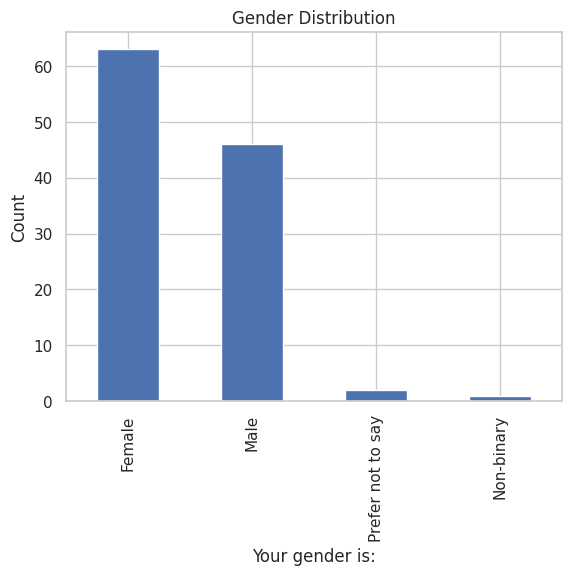


Status Distribution:
 Your current status is: - Selected Choice
Full-time Student    88
Employed Staff       18
Other                 6
Name: count, dtype: int64
Status Percentage:
 Your current status is: - Selected Choice
Full-time Student    78.571429
Employed Staff       16.071429
Other                 5.357143
Name: proportion, dtype: float64


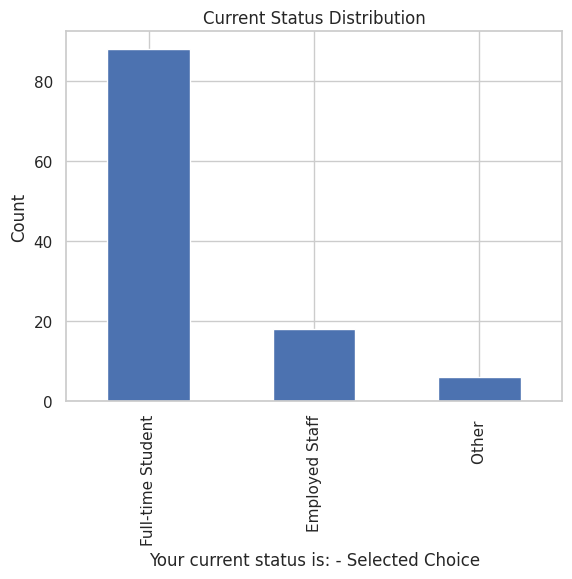


Nationality Distribution:
 What is your nationality? - Selected Choice
China              101
USA                  5
Other countries      3
India                2
korea , South        1
Name: count, dtype: int64
Nationality Percentage:
 What is your nationality? - Selected Choice
China              90.178571
USA                 4.464286
Other countries     2.678571
India               1.785714
korea , South       0.892857
Name: proportion, dtype: float64


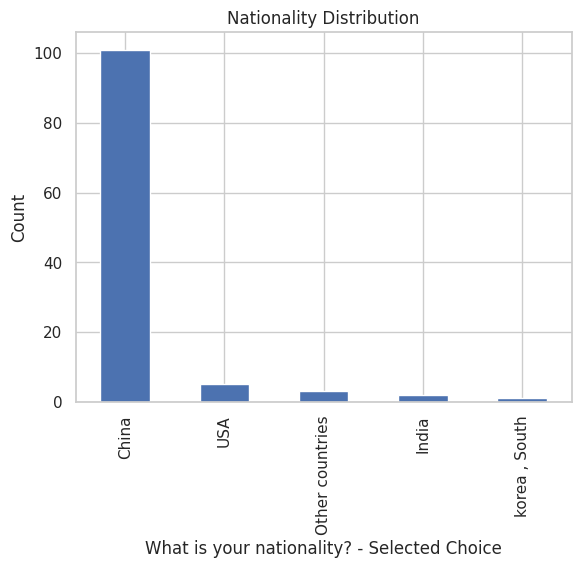


A/B Test Group Counts:
 ads_Group
1    58
0    54
Name: count, dtype: int64
A/B Test Group Percentage:
 ads_Group
1    51.785714
0    48.214286
Name: proportion, dtype: float64


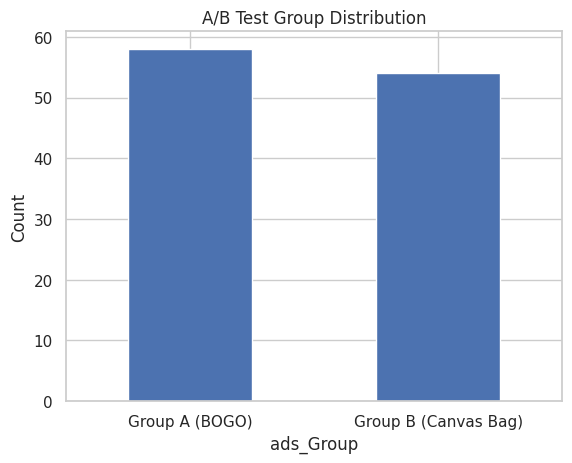

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data_text

sns.set(style="whitegrid")

gender_counts = df['Your gender is:'].value_counts()
gender_percentage = df['Your gender is:'].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_counts)
print("Gender Percentage:\n", gender_percentage)

gender_counts.plot(kind='bar', title='Gender Distribution')
plt.ylabel('Count')
plt.show()

status_counts = df['Your current status is: - Selected Choice'].value_counts()
status_percentage = df['Your current status is: - Selected Choice'].value_counts(normalize=True) * 100
print("\nStatus Distribution:\n", status_counts)
print("Status Percentage:\n", status_percentage)

status_counts.plot(kind='bar', title='Current Status Distribution')
plt.ylabel('Count')
plt.show()

nationality_counts = df['What is your nationality? - Selected Choice'].value_counts()
nationality_percentage = df['What is your nationality? - Selected Choice'].value_counts(normalize=True) * 100
print("\nNationality Distribution:\n", nationality_counts)
print("Nationality Percentage:\n", nationality_percentage)

nationality_counts.plot(kind='bar', title='Nationality Distribution')
plt.ylabel('Count')
plt.show()

ab_counts = df['ads_Group'].value_counts()
ab_percentage = df['ads_Group'].value_counts(normalize=True) * 100
print("\nA/B Test Group Counts:\n", ab_counts)
print("A/B Test Group Percentage:\n", ab_percentage)

ab_counts.plot(kind='bar', title='A/B Test Group Distribution', xticks=[0, 1])
plt.xticks(ticks=[0, 1], labels=['Group A (BOGO)', 'Group B (Canvas Bag)'], rotation=0)
plt.ylabel('Count')
plt.show()


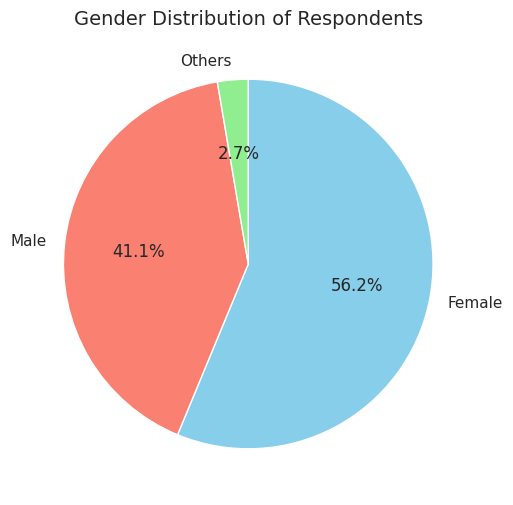

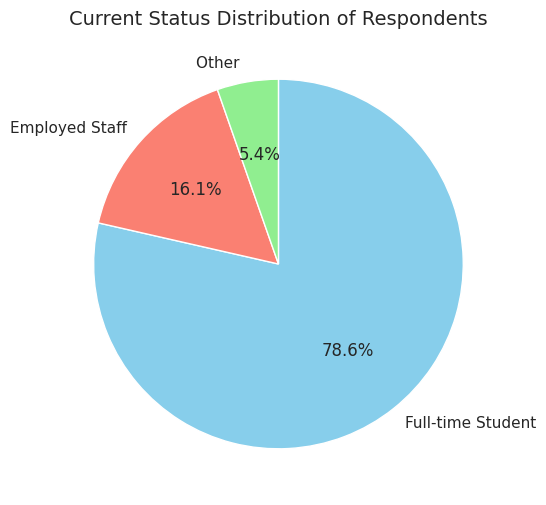

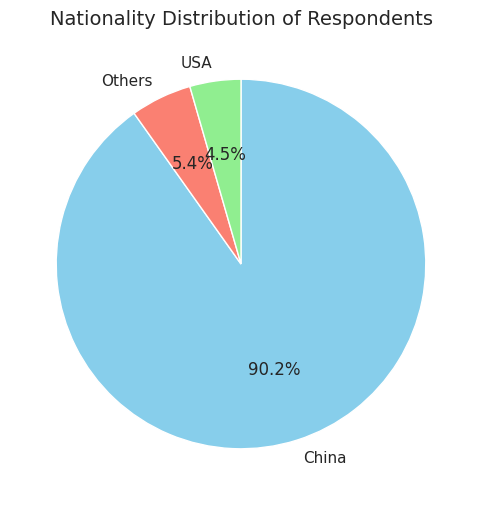

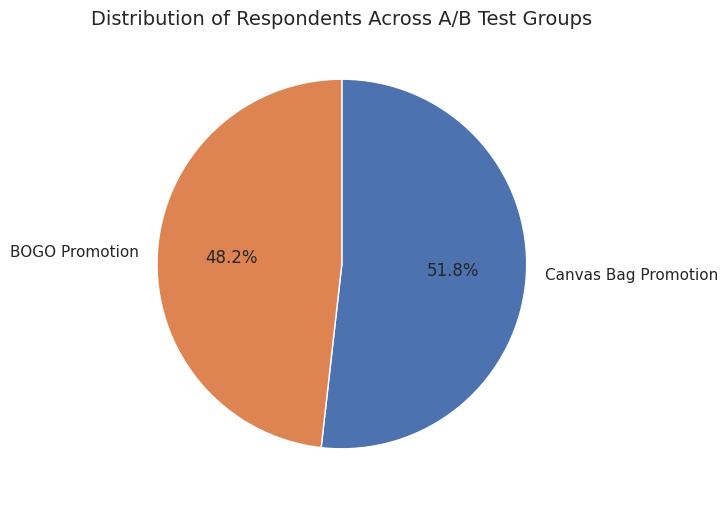

In [ ]:
import matplotlib.pyplot as plt
df['ads_Group'] = df['ads_Group'].astype(int)

colors = ['skyblue', 'salmon', 'lightgreen']

def collapse_small_categories(series, threshold=0.03):
    value_counts = series.value_counts(normalize=True)
    small_categories = value_counts[value_counts < threshold].index
    series_collapsed = series.replace(small_categories, 'Others')
    return series_collapsed

def plot_pie(series, title, threshold=0.03):
    series = collapse_small_categories(series, threshold)
    plt.figure(figsize=(6, 6))
    series.value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors
    )
    plt.title(title, fontsize=14)
    plt.ylabel('')
    plt.show()

def plot_abtest_pie(series, title):
    ab_group_mapping = {
        0: 'BOGO Promotion',
        1: 'Canvas Bag Promotion'
    }
    series_mapped = series.map(ab_group_mapping)

    plt.figure(figsize=(6,6))
    series_mapped.value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    plt.title(title, fontsize=14)
    plt.ylabel('')
    plt.show()


plot_pie(df['Your gender is:'], 'Gender Distribution of Respondents')

plot_pie(df['Your current status is: - Selected Choice'], 'Current Status Distribution of Respondents')

plot_pie(df['What is your nationality? - Selected Choice'], 'Nationality Distribution of Respondents')

plot_abtest_pie(df['ads_Group'], 'Distribution of Respondents Across A/B Test Groups')

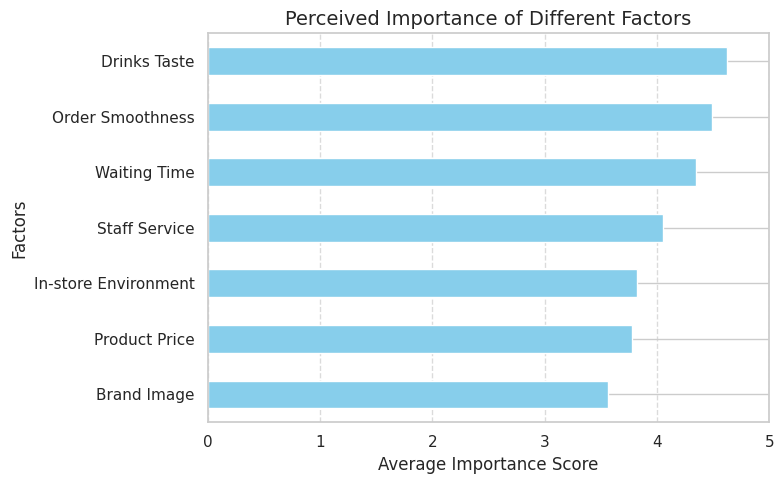

In [ ]:
df_1 = data_notext
import matplotlib.pyplot as plt

impact_cols = [
    'How much do these factors impact your overall consumer experience? - Brand Image',
    'How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness',
    'How much do these factors impact your overall consumer experience? - Drinks Taste',
    'How much do these factors impact your overall consumer experience? - Waiting Time',
    'How much do these factors impact your overall consumer experience? - Store Staff Service Attitude',
    'How much do these factors impact your overall consumer experience? - Product Price',
    'How much do these factors impact your overall consumer experience? - In-store environment'
]

impact_short_labels = [
    'Brand Image',
    'Order Smoothness',
    'Drinks Taste',
    'Waiting Time',
    'Staff Service',
    'Product Price',
    'In-store Environment'
]

impact_means = df_1[impact_cols].mean()

impact_means.index = impact_short_labels

impact_means = impact_means.sort_values(ascending=True)

plt.figure(figsize=(8, 5))
impact_means.plot(kind='barh', color='skyblue')
plt.title('Perceived Importance of Different Factors', fontsize=14)
plt.xlabel('Average Importance Score')
plt.ylabel('Factors')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

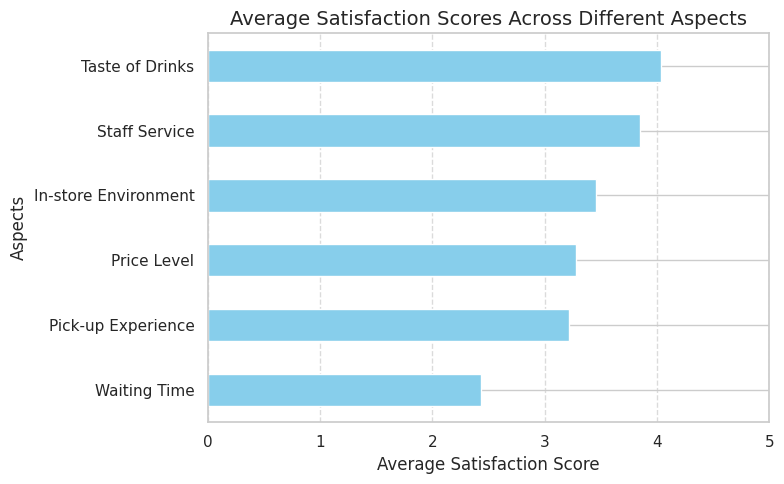

In [ ]:
satisfaction_cols = [
    'How\xa0would you rate the taste of HEYTEA drinks?',
    'How\xa0would you rate the in-store environment of HEYTEA Allston?',
    "How would you rate HEYTEA drink's price level?",
    'How would you rate the waiting time in line at HEYTEA?',
    'How would you rate your experience picking up your order in the store at HEYTEA?',
    'How would you rate the staff service at HEYTEA?'
]
short_labels = [
    'Taste of Drinks',
    'In-store Environment',
    'Price Level',
    'Waiting Time',
    'Pick-up Experience',
    'Staff Service'
]

satisfaction_means = df_1[satisfaction_cols].mean()

satisfaction_means.index = short_labels

satisfaction_means = satisfaction_means.sort_values(ascending=True)

plt.figure(figsize=(8, 5))
satisfaction_means.plot(kind='barh', color='skyblue')
plt.title('Average Satisfaction Scores Across Different Aspects', fontsize=14)
plt.xlabel('Average Satisfaction Score')
plt.ylabel('Aspects')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The survey sample was predominantly female (56.25%) and full-time students (78.57%), with 90.18% identifying as Chinese nationals. This composition is generally appropriate given HEYTEA’s major customer base, which tends to be young and student-oriented in the Chinese market. However, the heavy skew toward Chinese students suggests that the findings may be less generalizable to broader international or working professional populations. Future surveys may benefit from a more balanced demographic distribution if a wider customer base is of interest.

When examining the perceived importance of different factors affecting the overall consumer experience, drink taste was rated as the most important factor, followed closely by order/pick-up process smoothness and waiting time. In terms of satisfaction scores, drink taste received the highest average rating, suggesting that customers are generally very satisfied with HEYTEA’s core product. Staff service and in-store environment also received relatively high satisfaction scores. However, satisfaction with the waiting time was notably lower compared to other factors, indicating that queuing and order fulfillment speed are pain points that could negatively affect the overall customer experience. Addressing wait time issues could be a high-impact area for operational improvement.In contrast, factors like store staff service attitude and brand image were perceived as relatively less critical.

The EDA results suggest that HEYTEA’s strengths lie in product quality and service environment, which align well with what consumers care about most. However, given the relatively lower satisfaction with waiting time—despite its high perceived importance—HEYTEA should prioritize optimizing the ordering and pickup process, possibly through measures such as mobile ordering, better queue management, or staffing adjustments during peak times.

# Analysis 1-7 (记得改名，七个Analysis分别做吧，然后各部分的结论分别写在各个analysis的Visualization下面)

！！！每一个analysis必须一遍跑过，不然要从头重新跑，因为dataset会不对，会报错！！！

Analysis 1: Independent t-test

T-statistic: -1.9045141734967808
P-value: 0.05946645388203844

Group A:
 count    54.000000
mean      3.333333
std       1.081578
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: If you see this promotion offer today, will you try to place an order?, dtype: float64

Group B:
 count    58.000000
mean      3.724138
std       1.088909
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: If you see this promotion offer today, will you try to place an order?, dtype: float64


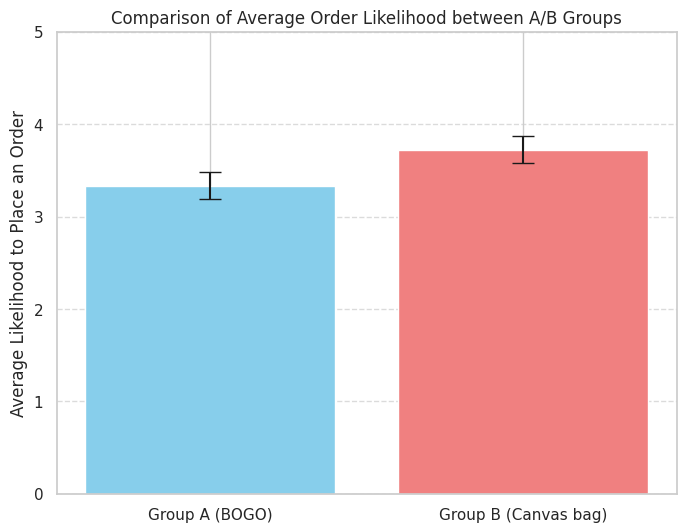

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

df_1['ads_Group'] = df_1['ads_Group'].astype(int)

col_name = 'If you see this promotion offer today, will you try to place an order?'
group_A = df_1[df_1['ads_Group'] == 0][col_name].dropna()
group_B = df_1[df_1['ads_Group'] == 1][col_name].dropna()

t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)
print("\nGroup A:\n", group_A.describe())
print("\nGroup B:\n", group_B.describe())

# ------- Visualization --------
means = [group_A.mean(), group_B.mean()]
errors = [group_A.std()/np.sqrt(len(group_A)), group_B.std()/np.sqrt(len(group_B))]

labels = ['Group A (BOGO)', 'Group B (Canvas bag)']

plt.figure(figsize=(8,6))
plt.bar(labels, means, yerr=errors, capsize=8, color=['skyblue', 'lightcoral'])
plt.ylabel('Average Likelihood to Place an Order')
plt.title('Comparison of Average Order Likelihood between A/B Groups')
plt.ylim(0,5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In this analysis, the measure used was respondents’ likelihood to place an order after seeing a promotional offer, rated on a 1 to 5 scale. Participants were randomly divided into two groups based on the type of promotion they were exposed to: Group A received a "Buy One Get One Free" (BOGO) offer, and Group B received a "Free Canvas Bag" offer. An independent samples t-test was conducted to compare the average likelihood of placing an order between the two groups. The hypothesis was that the type of promotional incentive would influence customers’ ordering intent, with the expectation that the gift promotion might perform differently than a price-based offer. The results showed that Group A had a mean score of 3.33 (n = 54, SD = 1.08) while Group B had a higher mean score of 3.72 (n = 58, SD = 1.09). The t-statistic was -1.905 and the p-value was 0.059. Following the guideline that p-values below 0.1 are considered significant, we conclude that the difference between the two groups is statistically significant. Specifically, offering a free canvas bag (Group B) appears to be more effective in driving customers’ intent to place an order compared to the traditional BOGO promotion (Group A).

From a marketing and operational perspective, these findings suggest that offering a tangible, desirable gift can create a stronger emotional appeal and purchase motivation than simply offering additional product quantity. Therefore, for future campaigns aiming to maximize purchase conversion, marketers should consider prioritizing creative gift-based promotions over price-based discounts.

Analysis 2: Chi-Squared

In [ ]:
from scipy.stats import chi2_contingency

df_chi = df_1[df_1['Your gender is:'].isin(['Male', 'Female'])].copy()

question_col = 'Do you think this promotion is worth recommending to your friends?'

contingency_table = pd.crosstab(df_chi['Your gender is:'], df_chi[question_col])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)
print("\nContingency Table (Observed):")
print(contingency_table)

df_plot = df_chi.copy()
df_A = df_plot[df_plot['ads_Group'] == 0]
df_B = df_plot[df_plot['ads_Group'] == 1]

result_matrix_A = df_A.pivot_table(
    index='Your gender is:',
    columns=question_col,
    aggfunc='size',
    fill_value=0
)
result_matrix_A = result_matrix_A.div(result_matrix_A.sum(axis=1), axis=0) * 100

result_matrix_B = df_B.pivot_table(
    index='Your gender is:',
    columns=question_col,
    aggfunc='size',
    fill_value=0
)
result_matrix_B = result_matrix_B.div(result_matrix_B.sum(axis=1), axis=0) * 100

print("\nGroup A (BOGO):")
print(result_matrix_A.round(1))

print("\nGroup B (Canvas Bag):")
print(result_matrix_B.round(1))

Chi-square statistic: 1.2230797665522328
Degrees of freedom: 1
P-value: 0.26875709233273287

Contingency Table (Observed):
Do you think this promotion is worth recommending to your friends?   0   1
Your gender is:                                                           
Female                                                              21  42
Male                                                                21  25

Group A (BOGO):
Do you think this promotion is worth recommending to your friends?     0     1
Your gender is:                                                               
Female                                                              51.6  48.4
Male                                                                65.2  34.8

Group B (Canvas Bag):
Do you think this promotion is worth recommending to your friends?     0     1
Your gender is:                                                               
Female                                                         

This analysis examined whether gender is associated with the likelihood of recommending a promotion using a Chi-square test of independence. The variables included gender (male/female) and whether respondents found the promotion worth recommending (yes/no). The test produced a Chi-square statistic of 1.22 with 1 degree of freedom and a p-value of 0.269, which is greater than the significance threshold of 0.1, indicating no statistically significant association between gender and recommendation behavior. However, descriptive patterns show that the Canvas Bag promotion (Group B) received higher recommendation rates across both genders—84.4% of females and 73.9% of males—compared to the BOGO offer in Group A. While gender alone did not influence recommendation significantly, the clear preference for the Canvas Bag promotion suggests that value-added gifts may resonate more strongly with customers than standard discounts. Heytea can consider leveraging experiential or tangible rewards in future campaigns to maximize recommendation rates across demographic groups.

In [ ]:
df_plot = df_1[df_1['Your gender is:'].isin(['Male', 'Female'])].copy()

question_col = 'Do you think this promotion is worth recommending to your friends?'

df_A = df_plot[df_plot['ads_Group'] == 0]
df_B = df_plot[df_plot['ads_Group'] == 1]

result_matrix_A = df_A.pivot_table(
    index='Your gender is:',
    columns=question_col,
    aggfunc='size',
    fill_value=0
)
result_matrix_A = result_matrix_A.div(result_matrix_A.sum(axis=1), axis=0) * 100

result_matrix_B = df_B.pivot_table(
    index='Your gender is:',
    columns=question_col,
    aggfunc='size',
    fill_value=0
)
result_matrix_B = result_matrix_B.div(result_matrix_B.sum(axis=1), axis=0) * 100

print("Group A (BOGO):")
print(result_matrix_A.round(1))

print("\nGroup B (Canvas Bag):")
print(result_matrix_B.round(1))


Group A (BOGO):
Do you think this promotion is worth recommending to your friends?     0     1
Your gender is:                                                               
Female                                                              51.6  48.4
Male                                                                65.2  34.8

Group B (Canvas Bag):
Do you think this promotion is worth recommending to your friends?     0     1
Your gender is:                                                               
Female                                                              15.6  84.4
Male                                                                26.1  73.9


Analysis 3: Multiple Linear Regression

In [ ]:
import statsmodels.api as sm

y_col = 'How satisfaction do you feel about your latest consumer experience at HEYTEA?'

x_cols = [
    'How\xa0would you rate the taste of HEYTEA drinks?',
    'How\xa0would you rate the in-store environment of HEYTEA Allston?',
    "How would you rate HEYTEA drink's price level?",
    'How would you rate the waiting time in line at HEYTEA?',
    'How would you rate your experience picking up your order in the store at HEYTEA?',
    'How would you rate the staff service at HEYTEA?'
]

df_reg = df_1[[y_col] + x_cols].dropna()

X = sm.add_constant(df_reg[x_cols])
y = df_reg[y_col]

model = sm.OLS(y, X).fit()

print(model.summary())

                                                          OLS Regression Results                                                         
Dep. Variable:     How satisfaction do you feel about your latest consumer experience at HEYTEA?   R-squared:                       0.213
Model:                                                                                       OLS   Adj. R-squared:                  0.147
Method:                                                                            Least Squares   F-statistic:                     3.210
Date:                                                                           Tue, 06 May 2025   Prob (F-statistic):            0.00759
Time:                                                                                   14:44:30   Log-Likelihood:                -93.882
No. Observations:                                                                             78   AIC:                             201.8
Df Residuals:                     

In this multiple linear regression analysis, the dependent variable was customer satisfaction with their latest HEYTEA experience, and the independent variables included ratings for drink taste, in-store environment, price level, waiting time, order pick-up experience, and staff service. The hypothesis was that these experience factors would significantly predict overall customer satisfaction. The results show that two factors were statistically significant predictors at the 0.1 level: the perceived taste of HEYTEA drinks (β = 0.2128，p = 0.193) and the perceived waiting time in line (β = 0.1503，p = 0.182) both turned out to be no less than 0.1, and therefore not significant despite being close, . and in-store environment (β = 0.2824, p = 0.046) turned out to be significant.

From a strategic perspective, the analysis highlights that the in-store environment is the only statistically significant driver of overall customer satisfaction with the HEYTEA experience. This suggests that factors such as store layout, cleanliness, ambiance, and atmosphere play a key role in shaping how customers feel about their visit. To capitalize on this insight, HEYTEA should prioritize investments and improvements in the physical environment of their stores. This may include enhancing interior design, creating a more comfortable seating area, optimizing lighting and décor, and maintaining a consistently clean and welcoming space. A strong in-store environment not only boosts satisfaction directly but may also improve perceptions of brand quality and encourage repeat visits.

Analysis 4: Interaction

In [ ]:
data_notext_copy = data_notext.copy()

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

data = data_notext.copy()
data.rename(columns={
    'How satisfaction do you feel about your latest consumer experience at HEYTEA?': 'customer_satisfaction',
    'How\xa0would you rate the in-store environment of HEYTEA Allston?': 'environment_factor',
    'How\xa0would you rate the taste of HEYTEA drinks?': 'drink_taste'
}, inplace=True)

model = smf.ols('customer_satisfaction ~ environment_factor * drink_taste', data=data).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     customer_satisfaction   R-squared:                       0.214
Model:                               OLS   Adj. R-squared:                  0.183
Method:                    Least Squares   F-statistic:                     6.732
Date:                   Tue, 06 May 2025   Prob (F-statistic):           0.000445
Time:                           14:44:30   Log-Likelihood:                -93.830
No. Observations:                     78   AIC:                             195.7
Df Residuals:                         74   BIC:                             205.1
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In this multiple linear regression analysis, the dependent variable was customer satisfaction, and the independent variables included the perceived store environment quality (environment_factor), the perceived drink taste (drink_taste), and their interaction term (environment_factor × drink_taste). The hypothesis was that both the store environment and drink taste would individually affect satisfaction, and that their interaction would further modify the impact. The results show that both environment quality (β = 1.975, p = 0.016) and drink taste (β = 1.650, p = 0.020) have significant positive effects on customer satisfaction at the 0.05 significance level. Additionally, the interaction term was significant and negative (β = -0.382, p = 0.042), suggesting that while each factor individually boosts satisfaction, their combined effect is slightly less than the sum of their individual impacts. The model’s R-squared was 0.214, indicating that about 21.4% of the variation in customer satisfaction can be explained by these three variables.

From a marketing and operational perspective, these results suggest that both the in-store environment and the taste quality are critical drivers of customer satisfaction, and improvements in either can meaningfully enhance customer perceptions. However, the negative interaction implies diminishing returns: when one factor (e.g., drink taste) is already rated very highly, further improving the other factor (e.g., environment) may have a smaller incremental impact on satisfaction. Therefore, HEYTEA should prioritize balancing investments between enhancing the drink product and optimizing the store environment, rather than focusing all resources on perfecting just one dimension.



Analysis 5: Chi-square

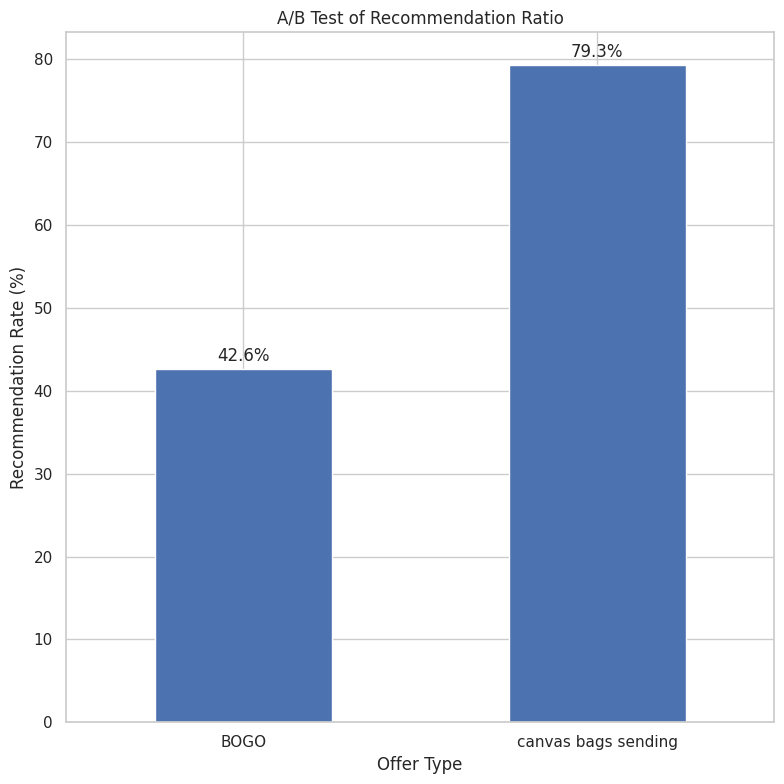

Chi-square = 14.4249, p-value = 0.0001, dof = 1


In [ ]:
from scipy.stats import chi2_contingency

data_notext_copy = data_notext_copy.rename(columns={
    'ads_Group': 'offer_type',
    'Do you think this promotion is worth recommending to your friends?': 'recommend'
})

filtered = data_notext_copy[data_notext_copy['recommend'].isin([0, 1])]
contingency = pd.crosstab(filtered['offer_type'], filtered['recommend'])
chi2, p, dof, expected = chi2_contingency(contingency)
percent_yes = (contingency[1] / contingency.sum(axis=1)) * 100

label_map = {0: 'BOGO', 1: 'canvas bags sending'}
new_labels = [ label_map[int(x)] for x in percent_yes.index ]
percent_yes.index = new_labels

fig, ax = plt.subplots(figsize=(8, 8))
bars = percent_yes.plot(kind='bar', ax=ax)

for bar in bars.patches:
    h = bar.get_height()
    ax.annotate(f'{h:.1f}%',
                xy=(bar.get_x() + bar.get_width()/2, h),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Offer Type')
ax.set_ylabel('Recommendation Rate (%)')
ax.set_title('A/B Test of Recommendation Ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, exp = chi2_contingency(contingency)
print(f'Chi-square = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}')

We conducted an A/B test to compare the effectiveness of two promotional methods: Buy-One-Get-One Free (BOGO) and Canvas Bag Giveaway. The recommendation rate for the canvas bag promotion was significantly higher at 79.3%, compared to 42.6% for the BOGO offer. A chi-square test confirmed this difference was statistically significant (χ² = 14.42, p < 0.001). This suggests that offering a canvas bag gift was much more effective in encouraging customers to recommend the promotion.

Analysis 6: Correlation

Pearson r = 0.3222, p-value = 0.0040


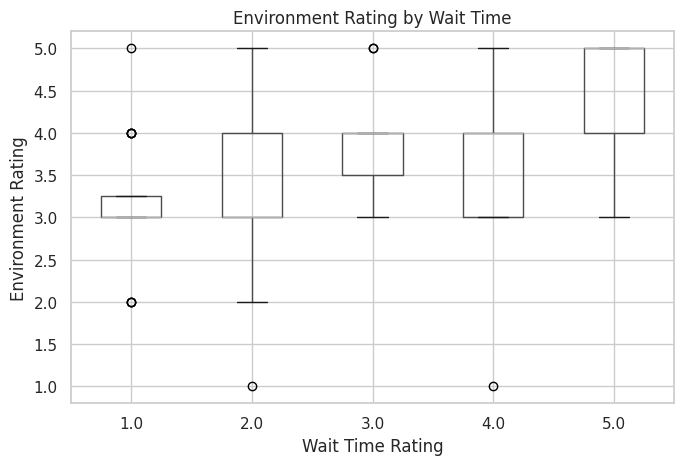

In [ ]:
from scipy.stats import pearsonr

# 等待时长 VS 店内环境
data = data_notext_copy.rename(columns={
    'How would you rate the waiting time in line at HEYTEA?': 'wait_time',
    'How\xa0would you rate the in-store environment of HEYTEA Allston?': 'environment_rating'
})

df = data[['wait_time', 'environment_rating']].dropna()

r, p = pearsonr(df['wait_time'], df['environment_rating'])
print(f'Pearson r = {r:.4f}, p-value = {p:.4f}')

fig, ax = plt.subplots(figsize=(7,5))
df.boxplot(column='environment_rating', by='wait_time', ax=ax)
ax.set_xlabel('Wait Time Rating')
ax.set_ylabel('Environment Rating')
ax.set_title('Environment Rating by Wait Time')
plt.suptitle('')
plt.tight_layout()
plt.show()



We analyzed the relationship between waiting time and in-store environment ratings. The Pearson correlation was r = 0.3222 with a p-value = 0.0040, indicating a moderate positive correlation that is statistically significant. This suggests that customers who reported longer wait times tended to also give higher environment ratings, possibly because longer waits happened during busier, more lively periods.

Analysis 7: Chi-Square

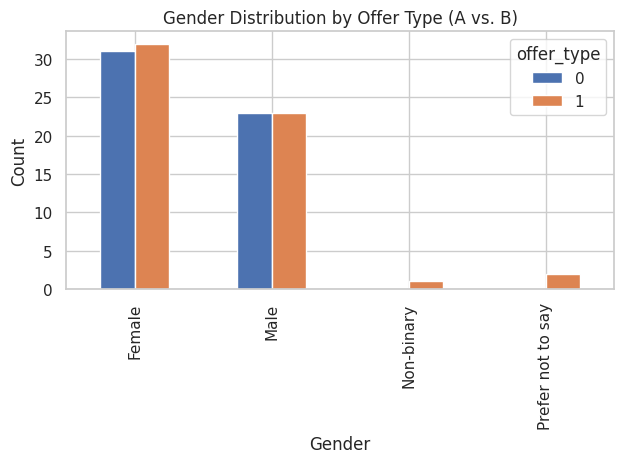

Chi-square = 2.8767, p-value = 0.4110, dof = 3


In [ ]:
data_notext_copy = data_notext_copy.rename(columns={
    'Your gender is:': 'gender'
})

df_gender = data_notext_copy[['gender', 'offer_type']].dropna()
contingency = pd.crosstab(df_gender['gender'], df_gender['offer_type'])
chi2, p, dof, expected = chi2_contingency(contingency)

fig, ax = plt.subplots()
contingency.plot(kind='bar', ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution by Offer Type (A vs. B)')
plt.tight_layout()
plt.show()

print(f'Chi-square = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}')

We compared the gender distribution between the two promotional offer groups: BOGO (Buy-One-Get-One Free) and Canvas Bag Giveaway. A chi-square test was done to see if there were any big differences in gender between the groups. The result showed χ² = 2.88 and a p-value = 0.4110, which means there was no significant difference.

From the bar chart, we can see that both groups had very similar numbers of female and male participants. A few participants identified as non-binary or chose not to say, but the numbers were very small. Overall, this shows that the way we assigned the promotional offers was fair across genders.

Because the gender distribution is similar, we can be confident that gender did not affect the results of the A/B test. The differences in recommendation rates between the two offers are more likely due to the offers themselves, not because of differences in gender.


# Further Exploration

In [ ]:
df = data_text.copy()
df.head()

,Duration (in seconds),Location Latitude,Location Longitude,User Language,Have you ever visited the HEYTEA store in Boston?,How often do you visit HEYTEA?,When was the last time you ordered HEYTEA drinks?,How do you usually order your drinks at HEYTEA ？,How satisfaction do you feel about your latest consumer experience at HEYTEA?,How much do these factors impact your overall consumer experience? - Brand Image,How much do these factors impact your overall consumer experience? - Order / Pick-up Process Smoothness,How much do these factors impact your overall consumer experience? - Drinks Taste,How much do these factors impact your overall consumer experience? - Waiting Time,How much do these factors impact your overall consumer experience? - Store Staff Service Attitude,How much do these factors impact your overall consumer experience? - Product Price,How much do these factors impact your overall consumer experience? - In-store environment,How would you rate the taste of HEYTEA drinks?,How would you rate the in-store environment of HEYTEA Allston?,How would you rate HEYTEA drink's price level?,How would you rate the waiting time in line at HEYTEA?,How would you rate your experience picking up your order in the store at HEYTEA?,How would you rate the staff service at HEYTEA?,Your current status is: - Selected Choice,Your gender is:,What is your nationality? - Selected Choice,Please share your suggestions or other valuable comments for HEYTEA's future improvements. （Optional）,ads_Group,How do you usually receive promotional information from HEYTEA? - Selected Choice,"If you see this promotion offer today, will you try to place an order?",How appealing is this promotion offer to you?,"Compared with other beverage brands, how competitive do you think this promotion is?",Do you think this promotion is worth recommending to your friends?
0,93,42.2904,-71.0712,ZH-S,1,About once a month or less,Can't remember,In- store order (not pre-ordered),4 Satisfied,4 Important,5 Very important,4 Important,3 Neutral,5 Very important,2 Unimportant,5 Very important,4 Satisfied,4 Satisfied,3 Neutral,3 Neutral,5 Very satisfied,5 Very satisfied,Full-time Student,Female,China,NaN,0,WeChat,4 Likely,3 Neutral,3 Neutral,0
1,68,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Online Order (using kiosk or app),3 Neutral,3 Neutral,4 Important,5 Very important,4 Important,4 Important,3 Neutral,3 Neutral,4 Satisfied,3 Neutral,3 Neutral,3 Neutral,2 Dissatisfied,4 Satisfied,Full-time Student,Male,China,NaN,1,Friend recommendation,4 Likely,3 Neutral,3 Neutral,0
2,75,42.3474,-71.1582,EN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-time Student,Male,India,NaN,0,Friend recommendation,4 Likely,3 Neutral,3 Neutral,1
3,93,42.415,-71.0527,ZH-S,1,Once a week or more,Within a week,Both are commonly used,4 Satisfied,3 Neutral,4 Important,5 Very important,4 Important,4 Important,2 Unimportant,3 Neutral,4 Satisfied,3 Neutral,4 Satisfied,4 Satisfied,4 Satisfied,5 Very satisfied,Full-time Student,Female,China,NaN,0,Red Notes,4 Likely,4 Appealing,3 Neutral,1
4,120,42.3513,-71.137,ZH-S,1,Once a week or more,Within 2 weeks,Both are commonly used,4 Satisfied,3 Neutral,5 Very important,5 Very important,5 Very important,5 Very important,5 Very important,3 Neutral,4 Satisfied,3 Neutral,2 Dissatisfied,1 Very dissatisfied,4 Satisfied,3 Neutral,Full-time Student,Female,China,NaN,1,Never noticed,3 Not sure,3 Neutral,4 Competitive,1


In [ ]:
df_satisfaction = df[df['Have you ever visited the HEYTEA store in Boston?']==1]
df_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Duration (in seconds)                                                                                    78 non-null     int64 
 1   Location Latitude                                                                                        78 non-null     object
 2   Location Longitude                                                                                       78 non-null     object
 3   User Language                                                                                            78 non-null     object
 4   Have you ever visited the HEYTEA store in Boston?                                                 

In [ ]:
df['Location Latitude'] = df['Location Latitude'].astype(float)
df['Location Longitude'] = df['Location Longitude'].astype(float)

import plotly.express as px

fig = px.density_mapbox(
    df,
    lat='Location Latitude',
    lon='Location Longitude',
    radius=20,
    center={"lat": 42.36, "lon": -71.05},
    zoom=11,
    mapbox_style="carto-positron",
    color_continuous_scale="YlOrRd",
    height=600,
    width=800
)

fig.update_layout(title="Survey Respondent Density Heatmap")
fig.show()


A/B Test Group Counts:
 ads_Group
1    58
0    54
Name: count, dtype: int64
A/B Test Group Percentage:
 ads_Group
1    51.785714
0    48.214286
Name: proportion, dtype: float64


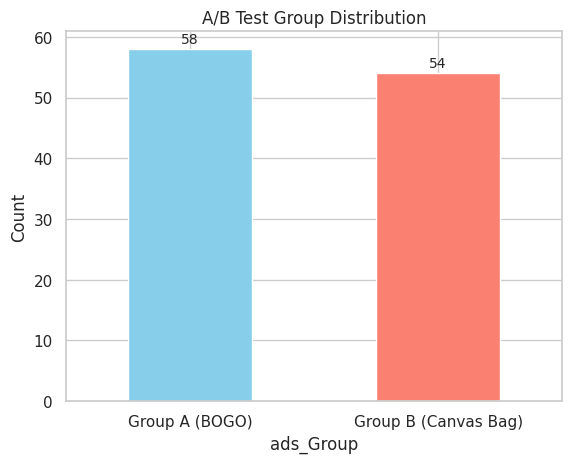

In [ ]:
ab_counts = df['ads_Group'].value_counts()
ab_percentage = df['ads_Group'].value_counts(normalize=True) * 100

print("\nA/B Test Group Counts:\n", ab_counts)
print("A/B Test Group Percentage:\n", ab_percentage)

ax = ab_counts.plot(kind='bar', title='A/B Test Group Distribution', color=['skyblue', 'salmon'])

plt.xticks(ticks=[0, 1], labels=['Group A (BOGO)', 'Group B (Canvas Bag)'], rotation=0)
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=2, fontsize=10)

plt.show()


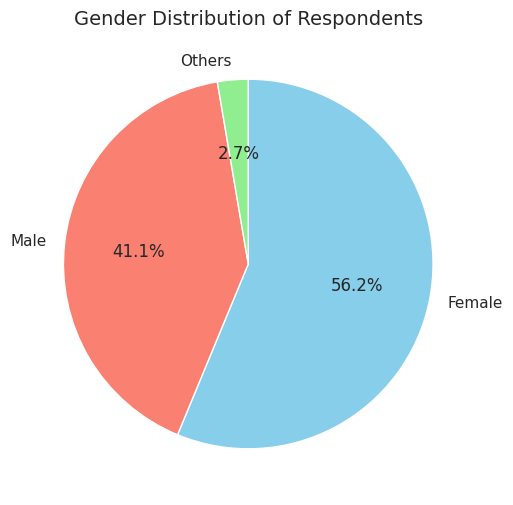

In [ ]:
plot_pie(df['Your gender is:'], 'Gender Distribution of Respondents')

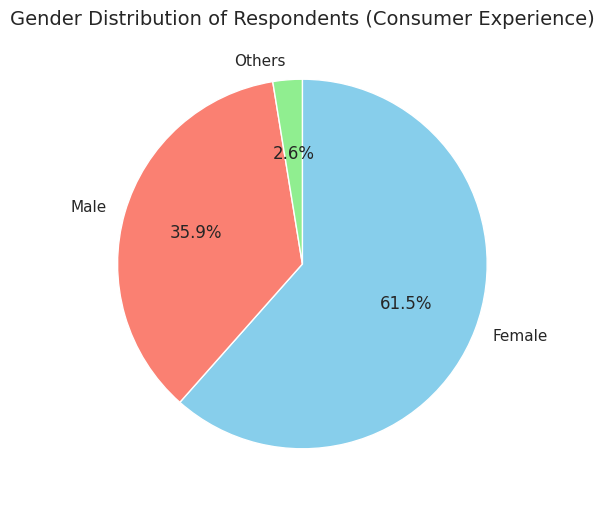

In [ ]:
plot_pie(df_satisfaction['Your gender is:'], 'Gender Distribution of Respondents (Consumer Experience)')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Duration (in seconds)                                                                                    112 non-null    int64  
 1   Location Latitude                                                                                        112 non-null    float64
 2   Location Longitude                                                                                       112 non-null    float64
 3   User Language                                                                                            112 non-null    object 
 4   Have you ever visited the HEYTEA store in Boston?                                          

In [ ]:
Info_channel = df['How do you usually receive promotional information from HEYTEA? - Selected Choice'].value_counts()
Info_channel = pd.DataFrame(Info_channel)
Info_channel

,count
How do you usually receive promotional information from HEYTEA? - Selected Choice,
Red Notes,54
Friend recommendation,28
Never noticed,26
Other channels (Please specify),2
WeChat,1
Instagram,1


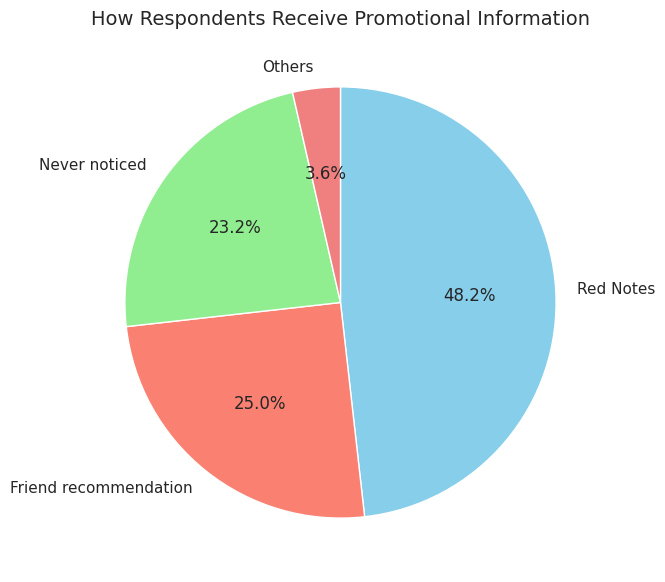

In [ ]:
Info_channel = pd.Series({
    'Red Notes': 54,
    'Friend recommendation': 28,
    'Never noticed': 26,
    'Other channels (Please specify)': 2,
    'WeChat': 1,
    'Instagram': 1
})

def collapse_small_categories(series, threshold=5):
    series = series.copy()
    small_categories = series[series < threshold]
    if not small_categories.empty:
        series = series.drop(small_categories.index)
        series['Others'] = small_categories.sum()
    return series

Info_channel_collapsed = collapse_small_categories(Info_channel)

colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

plt.figure(figsize=(7, 7))
Info_channel_collapsed.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=colors
)

plt.title('How Respondents Receive Promotional Information', fontsize=14)
plt.ylabel('')
plt.show()

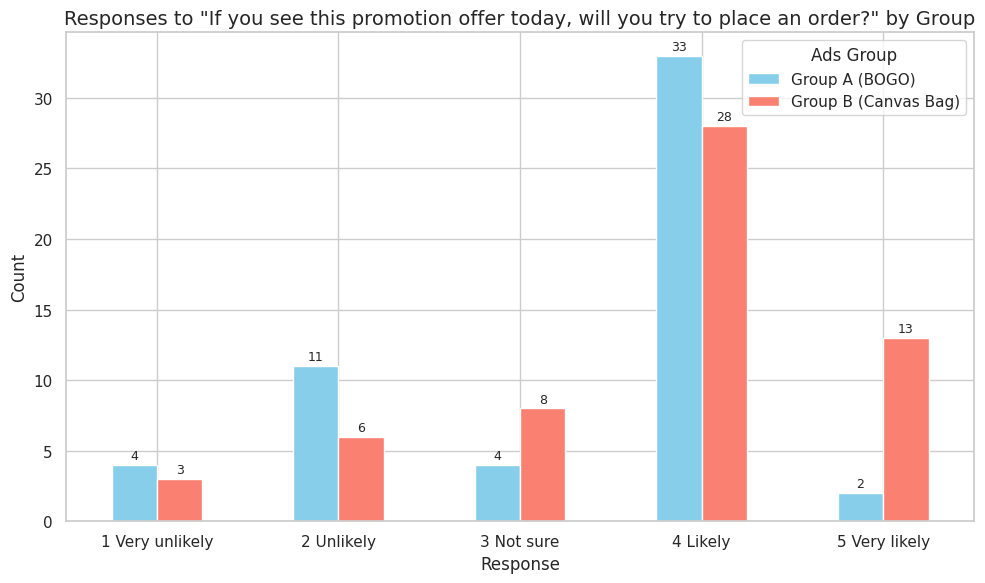

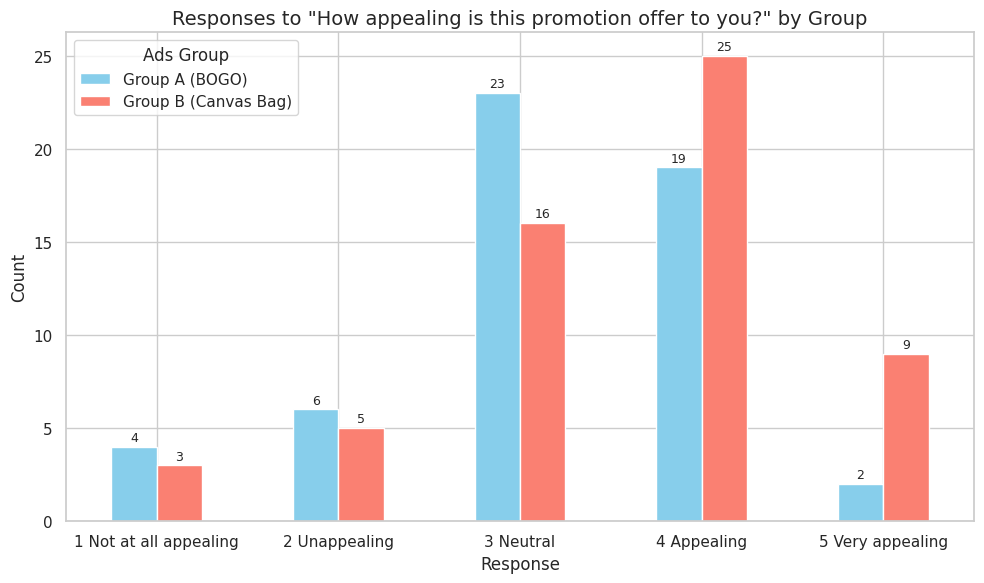

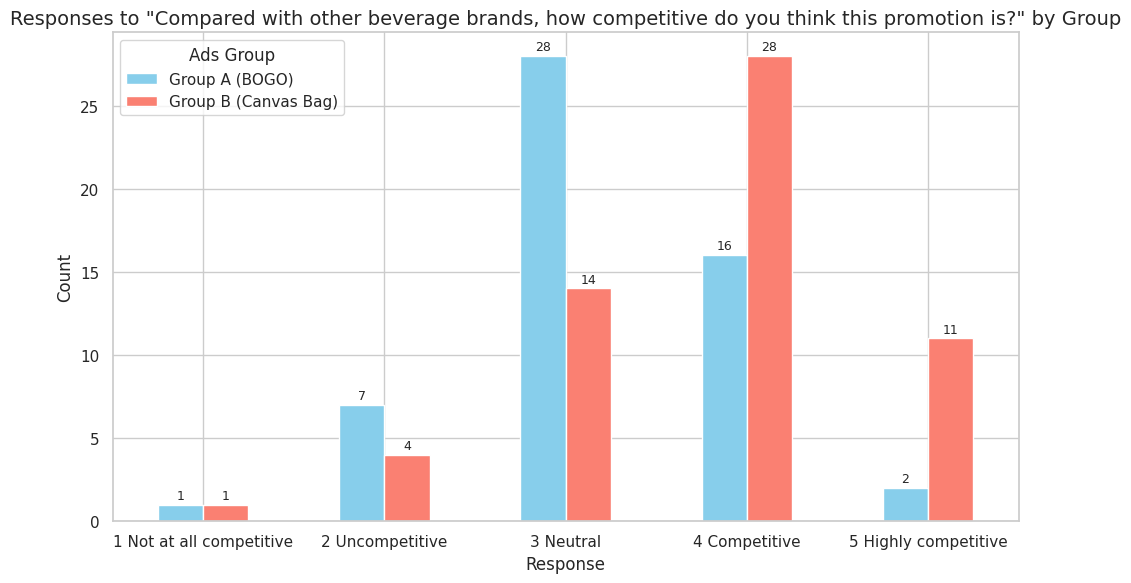

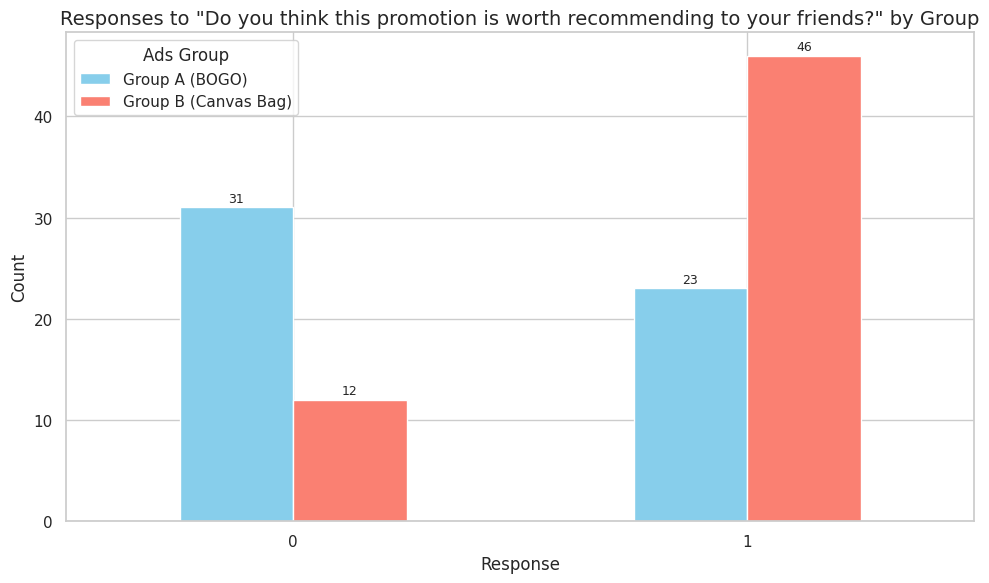

In [ ]:
columns = [
    'If you see this promotion offer today, will you try to place an order?',
    'How appealing is this promotion offer to you?',
    'Compared with other beverage brands, how competitive do you think this promotion is?',
    'Do you think this promotion is worth recommending to your friends?'
]

for col in columns:
    grouped_counts = df.groupby('ads_Group')[col].value_counts().unstack().fillna(0)

    ax = grouped_counts.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

    plt.title(f'Responses to "{col}" by Group', fontsize=14)
    plt.ylabel('Count')
    plt.xlabel('Response')
    plt.xticks(rotation=0)
    plt.legend(title='Ads Group', labels=['Group A (BOGO)', 'Group B (Canvas Bag)'])

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=2, fontsize=9)

    plt.tight_layout()
    plt.show()


In [ ]:
df['ads_Group'] = df['ads_Group'].apply(lambda x: 'BOGO' if x == 0 else 'Canvas Bag')

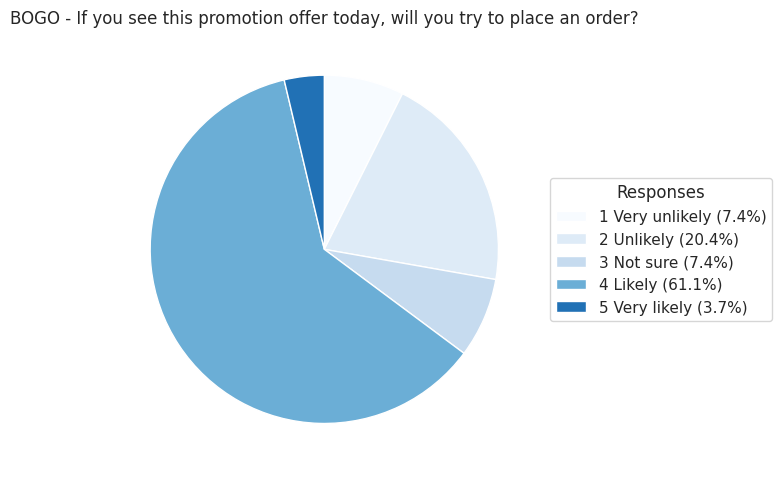

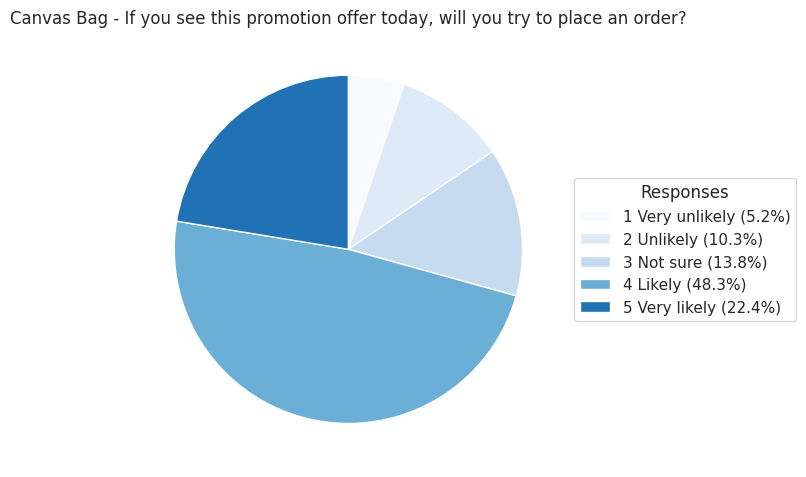

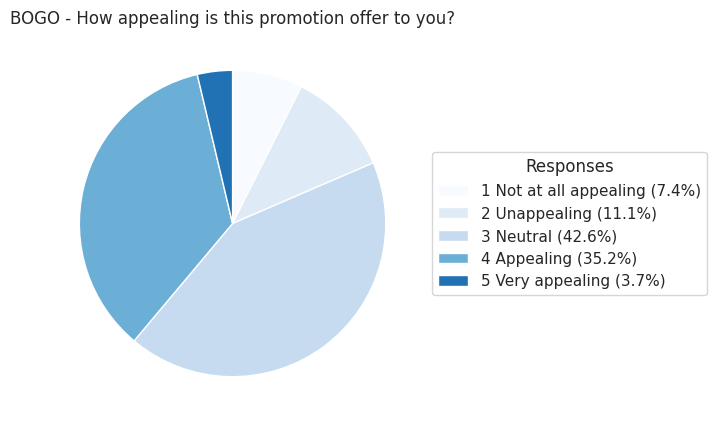

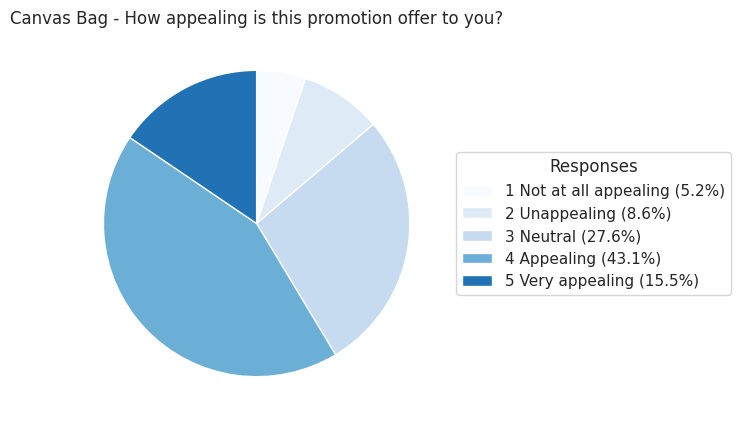

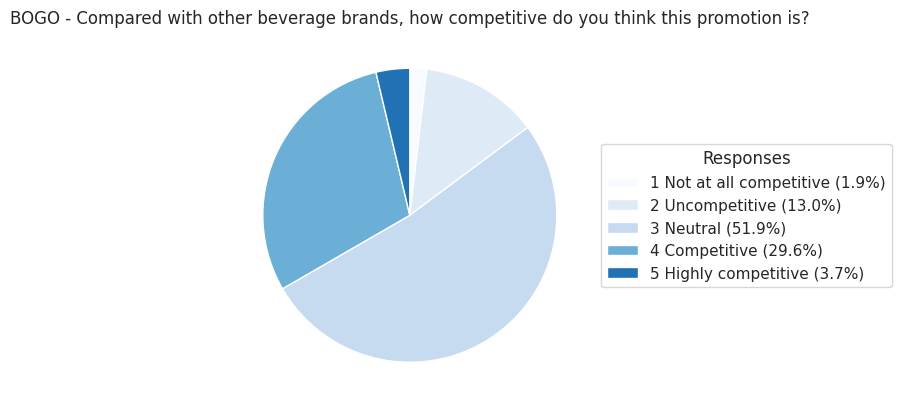

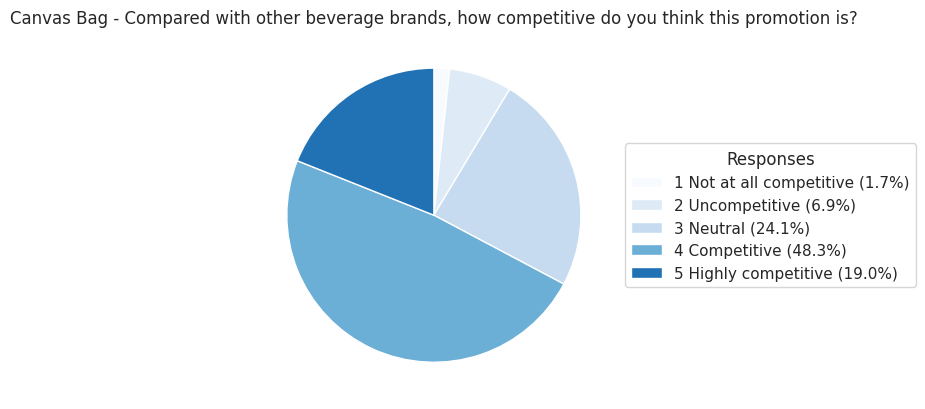

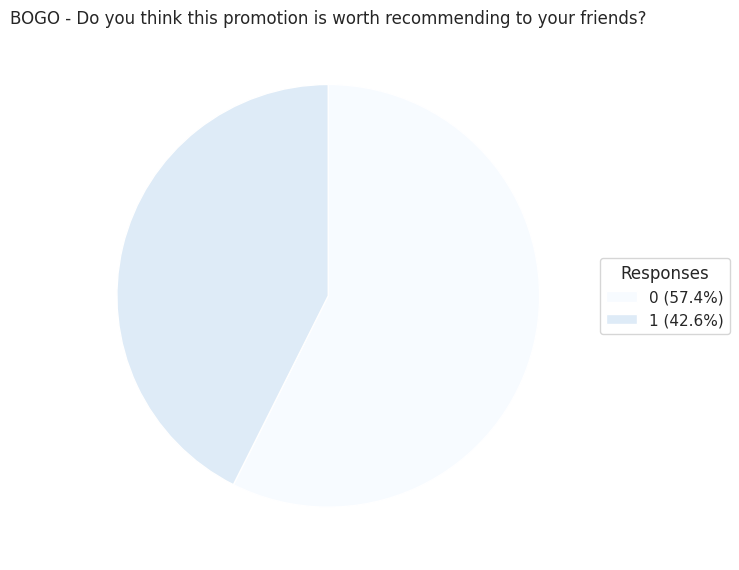

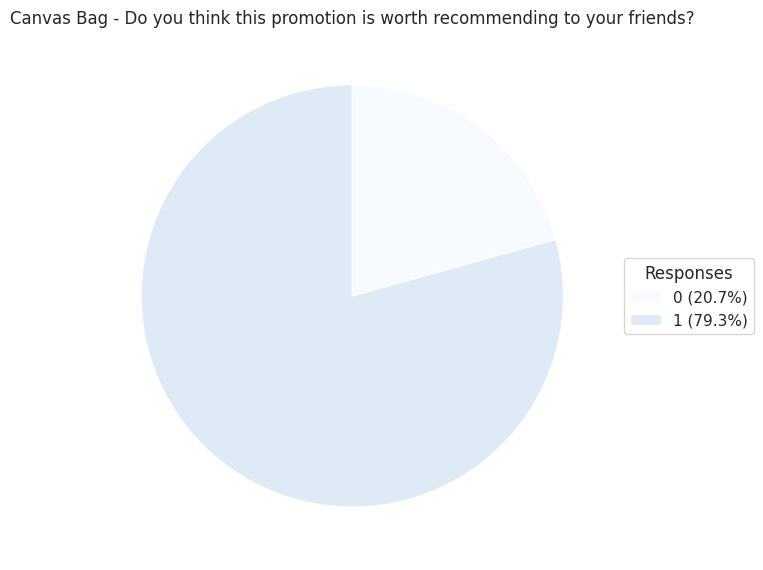

In [ ]:
import matplotlib.pyplot as plt

columns = [
    'If you see this promotion offer today, will you try to place an order?',
    'How appealing is this promotion offer to you?',
    'Compared with other beverage brands, how competitive do you think this promotion is?',
    'Do you think this promotion is worth recommending to your friends?'
]

group_name_mapping = {
    'A': 'BOGO',
    'B': 'Canvas Bag'
}

for col in columns:
    grouped_counts = df.groupby('ads_Group')[col].value_counts().unstack().fillna(0)

    for group in grouped_counts.index:
        fig, ax = plt.subplots(figsize=(7, 7))

        responses = grouped_counts.loc[group]
        total = responses.sum()

        colors = ['#F7FBFF', '#DEEBF7', '#C6DBEF', '#6BAED6', '#2171B5', '#08306B']
        #colors = ['#67000D', '#CB181D', '#FB6A4A', '#FC9272', '#FDBBA1', '#FEE0D2']

        wedges, texts = ax.pie(
            responses,
            startangle=90,
            counterclock=False,
            colors=colors
        )

        labels_with_pct = [f'{label} ({value/total:.1%})' for label, value in zip(responses.index, responses.values)]
        ax.legend(wedges, labels_with_pct, title="Responses", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

        ax.set_aspect('equal')
        group_title = group_name_mapping.get(group, group)

        plt.title(f'{group_title} - {col}', fontsize=12)
        plt.ylabel('')
        plt.tight_layout()
        plt.show()


In [ ]:
df_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Duration (in seconds)                                                                                    78 non-null     int64 
 1   Location Latitude                                                                                        78 non-null     object
 2   Location Longitude                                                                                       78 non-null     object
 3   User Language                                                                                            78 non-null     object
 4   Have you ever visited the HEYTEA store in Boston?                                                 

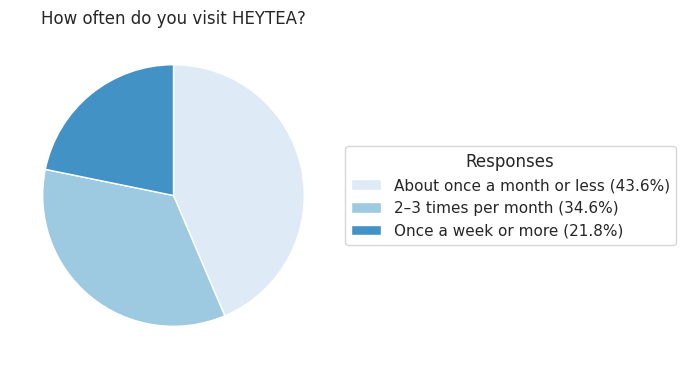

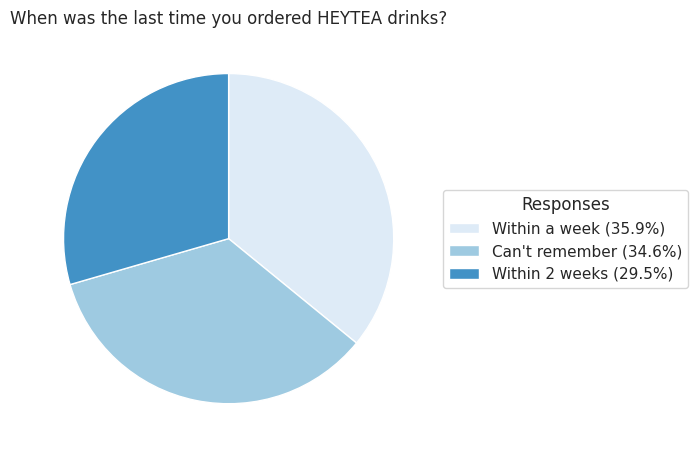

<ipython-input-56-a831bcae5e5d>:31: UserWarning:

Glyph 65311 (\N{FULLWIDTH QUESTION MARK}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 65311 (\N{FULLWIDTH QUESTION MARK}) missing from font(s) DejaVu Sans.



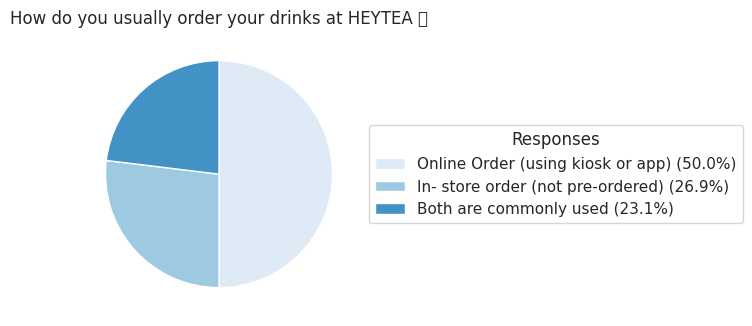

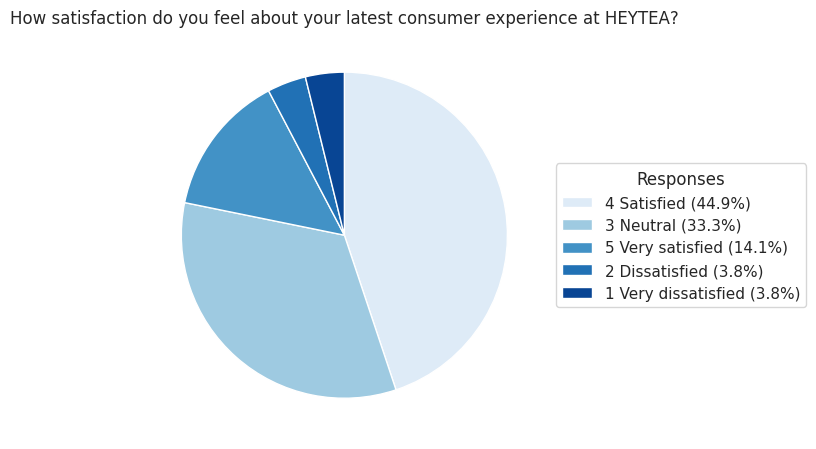

In [ ]:
import matplotlib.pyplot as plt

columns = [
    'How often do you visit HEYTEA?',
    'When was the last time you ordered HEYTEA drinks?',
    'How do you usually order your drinks at HEYTEA ？',
    'How satisfaction do you feel about your latest consumer experience at HEYTEA?'
]

colors = ['#DEEBF7', '#9ECAE1', '#4292C6', '#2171B5', '#084594']

for col in columns:
    counts = df_satisfaction[col].value_counts()
    total = counts.sum()

    fig, ax = plt.subplots(figsize=(7, 7))

    wedges, texts = ax.pie(
        counts,
        startangle=90,
        counterclock=False,
        colors=colors[:len(counts)]
    )

    labels = [f"{label} ({count/total:.1%})" for label, count in zip(counts.index, counts.values)]

    ax.legend(wedges, labels, title="Responses", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    ax.set_aspect('equal')
    plt.title(col, fontsize=12)
    plt.tight_layout()
    plt.show()


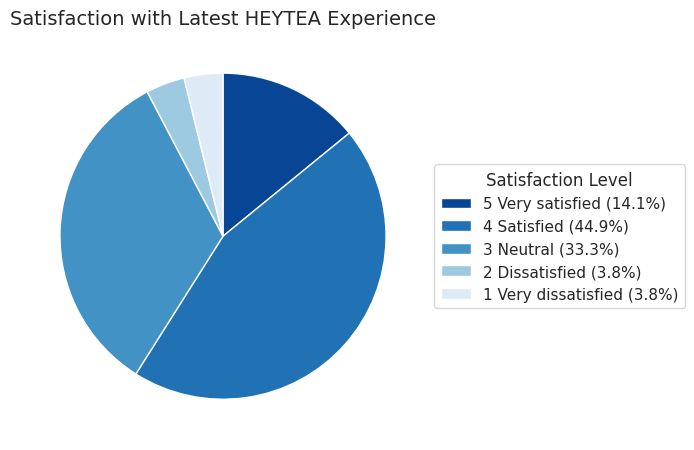

In [ ]:
import matplotlib.pyplot as plt

col = 'How satisfaction do you feel about your latest consumer experience at HEYTEA?'
colors = ['#084594', '#2171B5', '#4292C6', '#9ECAE1', '#DEEBF7']
order = [
    '5 Very satisfied',
    '4 Satisfied',
    '3 Neutral',
    '2 Dissatisfied',
    '1 Very dissatisfied'
]

counts = df_satisfaction[col].value_counts().reindex(order).fillna(0)
total = counts.sum()


fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts = ax.pie(
    counts,
    startangle=90,
    counterclock=False,
    colors=colors[:len(counts)]
)

labels = [f"{label} ({count/total:.1%})" for label, count in zip(counts.index, counts.values)]
ax.legend(wedges, labels, title="Satisfaction Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_aspect('equal')
plt.title('Satisfaction with Latest HEYTEA Experience', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
df_satisfaction['How satisfaction do you feel about your latest consumer experience at HEYTEA?'].value_counts()

,count
How satisfaction do you feel about your latest consumer experience at HEYTEA?,
4 Satisfied,35
3 Neutral,26
5 Very satisfied,11
2 Dissatisfied,3
1 Very dissatisfied,3


In [ ]:
df_satisfaction.groupby('How do you usually order your drinks at HEYTEA ？')['How satisfaction do you feel about your latest consumer experience at HEYTEA?'].value_counts().sort_index()

How do you usually order your drinks at HEYTEA ？  How satisfaction do you feel about your latest consumer experience at HEYTEA?
Both are commonly used                            1 Very dissatisfied                                                               1
                                                  2 Dissatisfied                                                                    2
                                                  3 Neutral                                                                         3
                                                  4 Satisfied                                                                       6
                                                  5 Very satisfied                                                                  6
In- store order (not pre-ordered)                 2 Dissatisfied                                                                    1
                                                  3 Neutral                                                                        11
                                                  4 Satisfied                                                                       8
                                                  5 Very satisfied                                                                  1
Online Order (using kiosk or app)                 1 Very dissatisfied                                                               2
                                                  3 Neutral                                                                        12
                                                  4 Satisfied                                                                      21
                                                  5 Very satisfied                                                                  4
Name: count, dtype: int64